# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat2017_df = pd.read_csv('../data/sat_2017.csv') #dataframe sat_2017.csv
act2017_df = pd.read_csv('../data/act_2017.csv') #dataframe act_2017.csv

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat2017_df.head(10) #displays first 10 rows of sat2017_df

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act2017_df.head(10) #displays first 10 rows of act2017_df

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:
For sat2017_df 'State' shows the various states of the US, 'Participation' shows the participation rates of each state, 'Evidence-Based Reading and Writing' is the score for the English Reading and Writing portion for each state, 'Math' is the score for the math portion for each state and 'Total' is the Evidence-Based Reading and Writing score and Math score for each state.

For act2017_df 'State' shows the various states of the US, 'Participation' shows the participation rates of each state, 'English' is the score for the English porition of each state, 'Math' is the score for the Math portion of each state, 'Reading' is the score for the Reading portion of each state, 'Science' is the score for the Science portion of each state and 'Composite' is the average of Math, English, Reading and Science scores combined for each state.

#### 4a. Does the data look complete? 

Answer: The data looks complete but it's odd that only ACT scores include the row with 'National' under the 'State' column after looking at the total rows for both sat2017_df.info() and act2017_df.info()

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [5]:
#Max results for SAT2017 Evidence-Based Reading and Writing
sat2017_df['Evidence-Based Reading and Writing'].max()

644

In [6]:
#Min results for SAT2017 Evidence-Based Reading and Writing
sat2017_df['Evidence-Based Reading and Writing'].min()

482

In [7]:
#Max results for SAT2017 Math 
sat2017_df['Math'].max()

651

In [8]:
#Min results for SAT2017 Math
sat2017_df['Math'].min()

52

In [9]:
#Max results for ACT2017 English
act2017_df['English'].max()

25.5

In [10]:
#Min results for ACT2017 English
act2017_df['English'].min()

16.3

In [11]:
#Max results for ACT2017 Reading
act2017_df['Reading'].max()

26.0

In [12]:
#Min results for ACT2017 Reading
act2017_df['Reading'].min()

18.1

In [13]:
#Max results for ACT2017 Math
act2017_df['Math'].max()

25.3

In [14]:
#Min results for ACT2017 English
act2017_df['Math'].min()

18.0

In [15]:
#Min results for ACT2017 English
act2017_df['Science'].max()

24.9

In [16]:
#Min results for ACT2017 English
act2017_df['Science'].min()

2.3

In [17]:
sat2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [18]:
act2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


The maximum and minimum values of the subtests seem ok except for the ACT science score of 2.3 which deiviates quite far away from the ACT subtests whose min values are in the teens. Also, the min value for SAT math of 52 is has quite a gap compared to the reading and writing portion of SAT. 
Participation rates for both SAT and ACT while not subtests but are object data types are a consideration to convert to int or float.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [19]:
#code
#To see the state the SAT math min score is in
sat2017_df[sat2017_df['Math']==sat2017_df['Math'].min()]


#To see the state ACT science min score is in
act2017_df[act2017_df['Science']==act2017_df['Science'].min()]

#### 5. What are your data types? 
Display the data types of each feature. 

In [20]:
#code
act2017_df.info() #To see the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [21]:
sat2017_df.info() #To see the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Participation data are object data type for both dataframes so you can't perform arithmetic functions on them.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [22]:
#Define function to convert the data type for Participation column from object to float
def partipation_convert(string):      
    string = string.replace('%','')
    string = float(string)/100
    return string
    

In [23]:
#code
sat2017_df['Participation']=sat2017_df['Participation'].apply(partipation_convert)
#Applying partipation_convert to sat2017_df['Participation']

In [24]:
act2017_df['Participation']=act2017_df['Participation'].apply(partipation_convert)
#Applying partipation_convert to sat2017_df['Participation']

- Fix any individual values preventing other columns from being the appropriate type.

In [25]:
#code
act2017_df['Composite']=act2017_df['Composite'].str.replace('x','') 
#Replacing the 'x' in one of the Composite entries with blank

- Finish your data modifications by making sure the columns are now typed appropriately.

In [26]:
#code
act2017_df['Composite']=act2017_df['Composite'].astype(float)
#Change act2017_df['Composite'] data type to float

- Display the data types again to confirm they are correct.

In [27]:
#Code:
sat2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [28]:
act2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [29]:
#code
sat2017_df.rename(columns={'State':'state', 'Participation':'sat2017_participation_rate', 'Evidence-Based Reading and Writing':'sat2017_avg_evidence_based_reading_and_writing_score', 'Math':'sat2017_avg_math_score',
       'Total':'sat2017_avg_total_score'},inplace = True)
#Renaming sat2017_df columns 

In [30]:
act2017_df.rename(columns={'State':'state', 'Participation':'act2017_participation_rate', 'English':'act2017_avg_english_score', 'Math':'act2017_avg_math_score', 'Reading':'act2017_avg_reading_score', 'Science':'act2017_avg_science_score',
       'Composite':'act2017_composite_score'},inplace = True)
#Renaming act2017_df columns 

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|sat2017_df/act2017_df/sat2018_df/act2018_df|Shows each state of the US| 
|sat2017_participation_rate|float64|sat2017_df|Shows SAT participation rate of each state for 2017|
|sat2017_avg_evidence_based_reading_and_writing_score|int64|sat2017_df|Shows SAT average evidence based reading and writing score of each state for 2017|
|sat2017_avg_math_score|int64|sat2017_df|Shows SAT average math score for each state for 2017|
|sat2017_avg_total_score|int64|sat2017_df|Shows SAT average total score for each state for 2017|
sat2018_participation_rate|float64|sat2018_df|Shows SAT participation rate of each state for 2018|
|sat2018_avg_evidence_based_reading_and_writing_score|int64|sat2018_df|Shows SAT average evidence based reading and writing score of each state for 2018|
|sat2018_avg_math_score|int64|sat2018_df|Shows SAT average math score for each state for 2018|
|sat2018_avg_total_score|int64|sat2018_df|Shows SAT average total score for each state for 2018|
|act2017_participation_rate|object|act2017_df|Shows ACT participation rate of each state for 2017|
|act2017_avg_english_score|float64|act2017_df|Shows ACT average english score of each state for 2017|
|act2017_avg_math_score|float64|act2017_df|Shows ACT average math score of each state for 2017|
|act2017_avg_reading_score|float64|act2017_df|Shows ACT average reading score of each state for 2017|
|act2017_avg_science_score|float64|act2017_df|Shows ACT average science score of each state for 2017|
|act2017_composite_score|float64|act2017_df|Shows ACT composite score of each state for 2017|
|act2017_participation_rate|object|act2018_df|Shows ACT participation rate of each state for 2018|
|act2018_avg_english_score|float64|act2018_df|Shows ACT average english score of each state for 2018|
|act2018_avg_math_score|float64|act2018_df|Shows ACT average math score of each state for 2018|
|act2018_avg_reading_score|float64|act2018_df|Shows ACT average reading score of each state for 2018|
|act2018_avg_science_score|float64|act2018_df|Shows ACT average science score of each state for 2018|
|act2018_composite_score|float64|act2018_df|Shows ACT composite score of each state for 2018|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [31]:
#code
act2017_df.drop(index = 0,inplace = True)
#Dropping the row with state "National" in act2017_df

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [32]:
#Code:
data_merge2017 = pd.merge(act2017_df,sat2017_df, on='state', how='outer')
#Merging act2017_df and sat2017_df together and storing it in data_merge2017
data_merge2017.head(10)
#Displaying first 10 rows of data_merge2017

,state,act2017_participation_rate,act2017_avg_english_score,act2017_avg_math_score,act2017_avg_reading_score,act2017_avg_science_score,act2017_composite_score,sat2017_participation_rate,sat2017_avg_evidence_based_reading_and_writing_score,sat2017_avg_math_score,sat2017_avg_total_score
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [33]:
#code
data_merge2017.to_csv(r'../data/data_merge2017.csv',index=False)


## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [34]:
#Creating variables sat2018_df and act2018_df to store SAT2018 and ACT2018 scores
sat2018_df = pd.read_csv('../data/sat_2018.csv')
act2018_df = pd.read_csv('../data/act_2018_updated.csv')

In [35]:
#Applying partipation_convert to sat2018_df['Participation'] to remove '%' sign and convert the data to float
sat2018_df['Participation']=sat2018_df['Participation'].apply(partipation_convert)
#Apply function to act2018_df and use lambda x function to convert data to float
act2018_df['Percentage of Students Tested']=act2018_df['Percentage of Students Tested'].apply(lambda x: float(x)/100)


In [36]:
sat2018_df.info() #Check Participation is float type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [37]:
act2018_df.info() #Check Percentage of Students Tested is float type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     float64
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [38]:
#Rearranging act2018_df columns to match respective act2017_df
act2018_df = act2018_df[['State', 'Percentage of Students Tested','Average English Score', 'Average Math Score', 'Average Reading Score','Average Science Score','Average Composite Score']]

In [39]:
sat2018_df.rename(columns={'State':'state', 'Participation':'sat2018_participation_rate', 'Evidence-Based Reading and Writing':'sat2018_avg_evidence_based_reading_and_writing_score', 'Math':'sat2018_avg_math_score',
       'Total':'sat2018_avg_total_score'},inplace = True)
#Renaming sat2018_df columns 


In [40]:
act2018_df.rename(columns={'State':'state', 'Percentage of Students Tested':'act2018_participation_rate', 'Average English Score':'act2018_avg_english_score', 'Average Math Score':'act2018_avg_math_score', 'Average Reading Score':'act2018_avg_reading_score', 'Average Science Score':'act2018_avg_science_score',
       'Average Composite Score':'act2018_composite_score'},inplace = True)
#Renaming act2018_df columns 


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [41]:
data_merge2018 = pd.merge(act2018_df,sat2018_df, on='state', how='outer') #Merging act2018_df and sat2018_df as data_merge2018
data_merge2018.to_csv(r'../data/data_merge2018.csv',index=False) #Saving data_merge2018


In [42]:
all_merge = pd.merge(data_merge2017,data_merge2018, on='state', how='outer') #Merging data_merge2017 and data_merge2018 as all_merge



In [43]:
all_merge.head()

,state,act2017_participation_rate,act2017_avg_english_score,act2017_avg_math_score,act2017_avg_reading_score,act2017_avg_science_score,act2017_composite_score,sat2017_participation_rate,sat2017_avg_evidence_based_reading_and_writing_score,sat2017_avg_math_score,...,act2018_participation_rate,act2018_avg_english_score,act2018_avg_math_score,act2018_avg_reading_score,act2018_avg_science_score,act2018_composite_score,sat2018_participation_rate,sat2018_avg_evidence_based_reading_and_writing_score,sat2018_avg_math_score,sat2018_avg_total_score
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,0.33,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,1.00,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [44]:
#Code:
all_merge.describe().T #Transposing all_merge describe features 

,count,mean,std,min,25%,50%,75%,max
act2017_participation_rate,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act2017_avg_english_score,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act2017_avg_math_score,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act2017_avg_reading_score,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act2017_avg_science_score,51.0,21.041176,3.182463,2.30,19.900,21.30,22.750,24.9
act2017_composite_score,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat2017_participation_rate,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat2017_avg_evidence_based_reading_and_writing_score,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat2017_avg_math_score,51.0,547.627451,84.909119,52.00,522.000,548.00,599.000,651.0
sat2017_avg_total_score,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [45]:
#code
def st_dev(x):
    
    mean = np.mean(x) #mean of x
    sq = [(i - mean)**2 for i in x] #Calculate the square of the distance between each datapoint of x and the mean
        
    return (sum(sq)/len(x))**0.5 #return the standard deviation for x

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [46]:
#Code:
sd = {key : st_dev(all_merge[key]) for key in all_merge.select_dtypes(['float', 'int64']).columns}
# Use st_dev in dictionary comprehension to store standard deivation for each column in all_merge

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [47]:
sd #To show manaually calcualted standard deviation

{'act2017_participation_rate': 0.3182417575123181,
 'act2017_avg_english_score': 2.3304876369363363,
 'act2017_avg_math_score': 1.9624620273436781,
 'act2017_avg_reading_score': 2.0469029314842646,
 'act2017_avg_science_score': 3.151107895464408,
 'act2017_composite_score': 2.000786081581989,
 'sat2017_participation_rate': 0.3492907076664507,
 'sat2017_avg_evidence_based_reading_and_writing_score': 45.21697020437866,
 'sat2017_avg_math_score': 84.07255521608297,
 'sat2017_avg_total_score': 91.58351056778743,
 'act2018_participation_rate': 0.33745194881997503,
 'act2018_avg_english_score': 2.4222536143202795,
 'act2018_avg_math_score': 2.015707255555717,
 'act2018_avg_reading_score': 2.145891884510421,
 'act2018_avg_science_score': 1.8516885484833543,
 'act2018_composite_score': 2.0855261815801147,
 'sat2018_participation_rate': 0.3694661922353942,
 'sat2018_avg_evidence_based_reading_and_writing_score': 47.03460978357609,
 'sat2018_avg_math_score': 47.30194550378352,
 'sat2018_avg_tota

In [48]:
for key in all_merge.select_dtypes(['float', 'int64']).columns:
    print(np.std(all_merge[key]))
#To show numpy standard deviation calculation

0.3182417575123181
2.3304876369363363
1.9624620273436781
2.0469029314842646
3.151107895464408
2.000786081581989
0.3492907076664507
45.21697020437866
84.07255521608297
91.58351056778743
0.33745194881997503
2.4222536143202795
2.015707255555717
2.145891884510421
1.8516885484833543
2.0855261815801147
0.3694661922353942
47.03460978357609
47.30194550378352
93.22742384464433


Answer: Both the manually calculated standard deviations and numpy std method are the same and they are quite close to the values of pandas describe standard deviations but not the same

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [49]:
#code
sat2017_partmax = all_merge.sort_values('sat2017_participation_rate',ascending=False).head()
sat2017_partmax

,state,act2017_participation_rate,act2017_avg_english_score,act2017_avg_math_score,act2017_avg_reading_score,act2017_avg_science_score,act2017_composite_score,sat2017_participation_rate,sat2017_avg_evidence_based_reading_and_writing_score,sat2017_avg_math_score,...,act2018_participation_rate,act2018_avg_english_score,act2018_avg_math_score,act2018_avg_reading_score,act2018_avg_science_score,act2018_composite_score,sat2018_participation_rate,sat2018_avg_evidence_based_reading_and_writing_score,sat2018_avg_math_score,sat2018_avg_total_score
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,...,0.32,23.7,22.7,24.4,23.0,23.6,0.92,497,480,977
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,...,0.22,24.5,23.9,24.7,23.9,24.4,1.00,511,499,1011
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,...,0.26,26.0,24.8,26.1,24.9,25.6,1.00,535,519,1053
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,0.17,23.7,23.1,24.5,23.4,23.2,1.00,505,492,998
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,...,0.16,25.1,24.7,25.6,24.4,25.1,0.96,535,528,1063


In [50]:
sat2017_partmin = all_merge.sort_values('sat2017_participation_rate').head()
sat2017_partmin

,state,act2017_participation_rate,act2017_avg_english_score,act2017_avg_math_score,act2017_avg_reading_score,act2017_avg_science_score,act2017_composite_score,sat2017_participation_rate,sat2017_avg_evidence_based_reading_and_writing_score,sat2017_avg_math_score,...,act2018_participation_rate,act2018_avg_english_score,act2018_avg_math_score,act2018_avg_reading_score,act2018_avg_science_score,act2018_composite_score,sat2018_participation_rate,sat2018_avg_evidence_based_reading_and_writing_score,sat2018_avg_math_score,sat2018_avg_total_score
34,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,...,0.98,19.1,20.3,20.7,20.5,20.3,0.02,640,643,1283
24,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634,607,...,1.00,18.2,18.1,18.9,18.6,18.6,0.03,630,606,1236
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,...,0.68,21.0,21.2,22.5,22.0,21.8,0.03,634,631,1265
25,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,...,1.00,19.5,19.7,20.5,20.0,20.0,0.04,633,629,1262
44,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,...,1.00,19.7,19.9,20.9,20.5,20.4,0.04,480,530,1010


In [51]:
sat2018_partmax = all_merge.sort_values('sat2018_participation_rate',ascending=False).head()
sat2018_partmax

,state,act2017_participation_rate,act2017_avg_english_score,act2017_avg_math_score,act2017_avg_reading_score,act2017_avg_science_score,act2017_composite_score,sat2017_participation_rate,sat2017_avg_evidence_based_reading_and_writing_score,sat2017_avg_math_score,...,act2018_participation_rate,act2018_avg_english_score,act2018_avg_math_score,act2018_avg_reading_score,act2018_avg_science_score,act2018_composite_score,sat2018_participation_rate,sat2018_avg_evidence_based_reading_and_writing_score,sat2018_avg_math_score,sat2018_avg_total_score
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,...,0.30,23.9,23.2,24.4,23.5,23.9,1.0,519,506,1025
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,...,0.26,26.0,24.8,26.1,24.9,25.6,1.0,535,519,1053
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,0.17,23.7,23.1,24.5,23.4,23.2,1.0,505,492,998
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,...,0.22,24.5,23.9,24.7,23.9,24.4,1.0,511,499,1011
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,...,0.36,21.9,21.6,23.2,22.1,22.3,1.0,508,493,1001


In [52]:
sat2018_partmin = all_merge.sort_values('sat2018_participation_rate').head()
sat2018_partmin

,state,act2017_participation_rate,act2017_avg_english_score,act2017_avg_math_score,act2017_avg_reading_score,act2017_avg_science_score,act2017_composite_score,sat2017_participation_rate,sat2017_avg_evidence_based_reading_and_writing_score,sat2017_avg_math_score,...,act2018_participation_rate,act2018_avg_english_score,act2018_avg_math_score,act2018_avg_reading_score,act2018_avg_science_score,act2018_composite_score,sat2018_participation_rate,sat2018_avg_evidence_based_reading_and_writing_score,sat2018_avg_math_score,sat2018_avg_total_score
34,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,...,0.98,19.1,20.3,20.7,20.5,20.3,0.02,640,643,1283
50,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2,0.03,626,604,...,1.00,19.0,19.7,20.6,20.3,20.0,0.03,633,625,1257
41,South Dakota,0.80,20.7,21.5,22.3,22.0,21.8,0.03,612,603,...,0.77,20.8,21.6,22.4,22.2,21.9,0.03,622,618,1240
27,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,...,1.00,19.4,19.8,20.4,20.1,20.1,0.03,629,623,1252
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,...,1.00,19.8,20.3,20.6,20.8,20.5,0.03,641,653,1294


In [53]:
act2017_partmax = all_merge.sort_values('act2017_participation_rate',ascending=False).head(20)
act2017_partmax

,state,act2017_participation_rate,act2017_avg_english_score,act2017_avg_math_score,act2017_avg_reading_score,act2017_avg_science_score,act2017_composite_score,sat2017_participation_rate,sat2017_avg_evidence_based_reading_and_writing_score,sat2017_avg_math_score,...,act2018_participation_rate,act2018_avg_english_score,act2018_avg_math_score,act2018_avg_reading_score,act2018_avg_science_score,act2018_composite_score,sat2018_participation_rate,sat2018_avg_evidence_based_reading_and_writing_score,sat2018_avg_math_score,sat2018_avg_total_score
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
17,Kentucky,1.00,19.6,19.4,20.5,20.1,20.0,0.04,631,616,...,1.00,19.9,19.7,20.8,20.1,20.2,0.04,630,618,1248
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,...,1.00,19.8,20.3,20.6,20.8,20.5,0.03,641,653,1294
44,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,...,1.00,19.7,19.9,20.9,20.5,20.4,0.04,480,530,1010
42,Tennessee,1.00,19.5,19.2,20.1,19.9,19.8,0.05,623,604,...,1.00,19.4,19.1,19.9,19.6,19.6,0.06,624,607,1231
40,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,...,1.00,17.3,18.2,18.6,18.5,18.3,0.55,547,523,1070
36,Oklahoma,1.00,18.5,18.8,20.1,19.6,19.4,0.07,530,517,...,1.00,18.4,18.8,20.1,19.4,19.3,0.08,541,521,1062
33,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,...,1.00,18.0,19.3,19.5,19.2,19.1,0.52,554,543,1098
28,Nevada,1.00,16.3,18.0,18.1,18.2,17.8,0.26,563,553,...,1.00,16.6,17.8,18.0,17.9,17.7,0.23,574,566,1140
26,Montana,1.00,19.0,20.2,21.0,20.5,20.3,0.10,605,591,...,1.00,18.7,19.9,20.7,20.0,20.0,0.10,606,592,1198


In [54]:
act2017_partmin = all_merge.sort_values('act2017_participation_rate').head()
act2017_partmin

,state,act2017_participation_rate,act2017_avg_english_score,act2017_avg_math_score,act2017_avg_reading_score,act2017_avg_science_score,act2017_composite_score,sat2017_participation_rate,sat2017_avg_evidence_based_reading_and_writing_score,sat2017_avg_math_score,...,act2018_participation_rate,act2018_avg_english_score,act2018_avg_math_score,act2018_avg_reading_score,act2018_avg_science_score,act2018_composite_score,sat2018_participation_rate,sat2018_avg_evidence_based_reading_and_writing_score,sat2018_avg_math_score,sat2018_avg_total_score
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,...,0.07,23.8,23.6,24.7,23.4,24.0,0.99,512,501,1013
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,...,0.16,25.1,24.7,25.6,24.4,25.1,0.96,535,528,1063
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,0.17,23.7,23.1,24.5,23.4,23.2,1.00,505,492,998
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,...,0.15,24.4,23.6,25.0,23.5,24.2,0.97,513,505,1018
38,Pennsylvania,0.23,23.4,23.4,24.2,23.3,23.7,0.65,540,531,...,0.20,23.3,23.2,24.0,23.1,23.5,0.70,547,539,1086


In [55]:
act2018_partmax = all_merge.sort_values('act2018_participation_rate',ascending=False).head(20)
act2018_partmax

,state,act2017_participation_rate,act2017_avg_english_score,act2017_avg_math_score,act2017_avg_reading_score,act2017_avg_science_score,act2017_composite_score,sat2017_participation_rate,sat2017_avg_evidence_based_reading_and_writing_score,sat2017_avg_math_score,...,act2018_participation_rate,act2018_avg_english_score,act2018_avg_math_score,act2018_avg_reading_score,act2018_avg_science_score,act2018_composite_score,sat2018_participation_rate,sat2018_avg_evidence_based_reading_and_writing_score,sat2018_avg_math_score,sat2018_avg_total_score
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
17,Kentucky,1.00,19.6,19.4,20.5,20.1,20.0,0.04,631,616,...,1.00,19.9,19.7,20.8,20.1,20.2,0.04,630,618,1248
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,...,1.00,19.8,20.3,20.6,20.8,20.5,0.03,641,653,1294
44,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,...,1.00,19.7,19.9,20.9,20.5,20.4,0.04,480,530,1010
42,Tennessee,1.00,19.5,19.2,20.1,19.9,19.8,0.05,623,604,...,1.00,19.4,19.1,19.9,19.6,19.6,0.06,624,607,1231
40,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,...,1.00,17.3,18.2,18.6,18.5,18.3,0.55,547,523,1070
36,Oklahoma,1.00,18.5,18.8,20.1,19.6,19.4,0.07,530,517,...,1.00,18.4,18.8,20.1,19.4,19.3,0.08,541,521,1062
35,Ohio,0.75,21.2,21.6,22.5,22.0,22.0,0.12,578,570,...,1.00,19.3,20.3,20.8,20.4,20.3,0.18,552,547,1099
33,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,...,1.00,18.0,19.3,19.5,19.2,19.1,0.52,554,543,1098
28,Nevada,1.00,16.3,18.0,18.1,18.2,17.8,0.26,563,553,...,1.00,16.6,17.8,18.0,17.9,17.7,0.23,574,566,1140


In [56]:
act2018_partmin = all_merge.sort_values('act2018_participation_rate').head()
act2018_partmin

,state,act2017_participation_rate,act2017_avg_english_score,act2017_avg_math_score,act2017_avg_reading_score,act2017_avg_science_score,act2017_composite_score,sat2017_participation_rate,sat2017_avg_evidence_based_reading_and_writing_score,sat2017_avg_math_score,...,act2018_participation_rate,act2018_avg_english_score,act2018_avg_math_score,act2018_avg_reading_score,act2018_avg_science_score,act2018_composite_score,sat2018_participation_rate,sat2018_avg_evidence_based_reading_and_writing_score,sat2018_avg_math_score,sat2018_avg_total_score
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,...,0.07,23.8,23.6,24.7,23.4,24.0,0.99,512,501,1013
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,...,0.15,24.4,23.6,25.0,23.5,24.2,0.97,513,505,1018
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,...,0.16,25.1,24.7,25.6,24.4,25.1,0.96,535,528,1063
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,0.17,23.7,23.1,24.5,23.4,23.2,1.00,505,492,998
38,Pennsylvania,0.23,23.4,23.4,24.2,23.3,23.7,0.65,540,531,...,0.20,23.3,23.2,24.0,23.1,23.5,0.70,547,539,1086


In [57]:
sat2017_totalmax= all_merge.sort_values('sat2017_avg_total_score',ascending = False)[['state','sat2017_avg_total_score']].head()
sat2017_totalmax

,state,sat2017_avg_total_score
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [58]:
sat2017_totalmin= all_merge.sort_values('sat2017_avg_total_score')[['state','sat2017_avg_total_score']].head()
sat2017_totalmin

,state,sat2017_avg_total_score
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


In [59]:
sat2018_totalmax= all_merge.sort_values('sat2018_avg_total_score',ascending = False)[['state','sat2018_avg_total_score']].head()
sat2018_totalmax

,state,sat2018_avg_total_score
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In [60]:
sat2018_totalmin= all_merge.sort_values('sat2018_avg_total_score')[['state','sat2018_avg_total_score']].head()
sat2018_totalmin

,state,sat2018_avg_total_score
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


In [61]:
act2017_totalmax= all_merge.sort_values('act2017_composite_score',ascending = False)[['state','act2017_composite_score']].head()
act2017_totalmax

,state,act2017_composite_score
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [62]:
act2017_totalmin= all_merge.sort_values('act2017_composite_score')[['state','act2017_composite_score']].head()
act2017_totalmin

,state,act2017_composite_score
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [63]:
act2018_totalmax= all_merge.sort_values('act2018_composite_score',ascending = False)[['state','act2018_composite_score']].head()
act2018_totalmax

,state,act2018_composite_score
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [64]:
act2018_totalmin= all_merge.sort_values('act2018_composite_score')[['state','act2018_composite_score']].head()
act2018_totalmin

,state,act2018_composite_score
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


In [65]:
sat_partchange = all_merge[(all_merge['sat2017_participation_rate']==1.0)&(all_merge['sat2018_participation_rate']<1.0)]
sat_partchange

,state,act2017_participation_rate,act2017_avg_english_score,act2017_avg_math_score,act2017_avg_reading_score,act2017_avg_science_score,act2017_composite_score,sat2017_participation_rate,sat2017_avg_evidence_based_reading_and_writing_score,sat2017_avg_math_score,...,act2018_participation_rate,act2018_avg_english_score,act2018_avg_math_score,act2018_avg_reading_score,act2018_avg_science_score,act2018_composite_score,sat2018_participation_rate,sat2018_avg_evidence_based_reading_and_writing_score,sat2018_avg_math_score,sat2018_avg_total_score
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.0,482,468,...,0.32,23.7,22.7,24.4,23.0,23.6,0.92,497,480,977


In [66]:
act_partchange = all_merge[(all_merge['act2017_participation_rate']==1.0)&(all_merge['act2018_participation_rate']<1.0)]
act_partchange

,state,act2017_participation_rate,act2017_avg_english_score,act2017_avg_math_score,act2017_avg_reading_score,act2017_avg_science_score,act2017_composite_score,sat2017_participation_rate,sat2017_avg_evidence_based_reading_and_writing_score,sat2017_avg_math_score,...,act2018_participation_rate,act2018_avg_english_score,act2018_avg_math_score,act2018_avg_reading_score,act2018_avg_science_score,act2018_composite_score,sat2018_participation_rate,sat2018_avg_evidence_based_reading_and_writing_score,sat2018_avg_math_score,sat2018_avg_total_score
5,Colorado,1.0,20.1,20.3,21.2,20.9,20.8,0.11,606,595,...,0.30,23.9,23.2,24.4,23.5,23.9,1.00,519,506,1025
23,Minnesota,1.0,20.4,21.5,21.8,21.6,21.5,0.03,644,651,...,0.99,20.2,21.4,21.7,21.4,21.3,0.04,643,655,1298


In [67]:
sat_greater50 = all_merge[(all_merge['sat2017_participation_rate']>0.5)|(all_merge['sat2018_participation_rate']>0.5)]
sat_greater50

,state,act2017_participation_rate,act2017_avg_english_score,act2017_avg_math_score,act2017_avg_reading_score,act2017_avg_science_score,act2017_composite_score,sat2017_participation_rate,sat2017_avg_evidence_based_reading_and_writing_score,sat2017_avg_math_score,...,act2018_participation_rate,act2018_avg_english_score,act2018_avg_math_score,act2018_avg_reading_score,act2018_avg_science_score,act2018_composite_score,sat2018_participation_rate,sat2018_avg_evidence_based_reading_and_writing_score,sat2018_avg_math_score,sat2018_avg_total_score
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,...,0.30,23.9,23.2,24.4,23.5,23.9,1.00,519,506,1025
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,...,0.26,26.0,24.8,26.1,24.9,25.6,1.00,535,519,1053
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,0.17,23.7,23.1,24.5,23.4,23.2,1.00,505,492,998
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,...,0.32,23.7,22.7,24.4,23.0,23.6,0.92,497,480,977
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,...,0.66,19.2,19.3,21.1,19.5,19.9,0.56,550,549,1099
10,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,...,0.53,20.9,20.7,21.2,21.4,21.4,0.70,542,522,1064
11,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,...,0.89,18.2,19.0,19.1,19.0,18.9,0.56,480,530,1010
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,...,0.36,21.9,21.6,23.2,22.1,22.3,1.00,508,493,1001
13,Illinois,0.93,21.0,21.2,21.6,21.3,21.4,0.09,559,556,...,0.43,24.1,23.4,24.2,23.4,23.9,0.99,513,506,1019


In [68]:
act_greater50 = all_merge[(all_merge['act2017_participation_rate']>0.5)|(all_merge['act2018_participation_rate']>0.5)]['state']
act_greater50

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
5           Colorado
9            Florida
10           Georgia
11            Hawaii
13          Illinois
15              Iowa
16            Kansas
17          Kentucky
18         Louisiana
23         Minnesota
24       Mississippi
25          Missouri
26           Montana
27          Nebraska
28            Nevada
31        New Mexico
33    North Carolina
34      North Dakota
35              Ohio
36          Oklahoma
40    South Carolina
41      South Dakota
42         Tennessee
44              Utah
48     West Virginia
49         Wisconsin
50           Wyoming
Name: state, dtype: object

District of Columbia saw a SAT participation rate change from 100% in 2017 to 92% in 2018 which is 8% decrease year to year
Colorado saw a ACT participation rate change from 100% to 30% which is a 70% decrease year to year and Minnesota saw a ACT participation rate change from 100% to 99% which is a 1% decrease year to year
States that had SAT participation rates >50% either year are California, Colorado, Connecticut, Delaware,          District of Columbia, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Maine, Maryland, Massachusetts, Michigan,    New Hampshire, New Jersey, New York, North Carolina, Pennsylvania, Rhode Island, South Carolina, Texas, Vermont, Virginia, Washington
States that had ACT participation rates >50% either year are Alabama, Alaska, Arizona, Arkansas, Colorado, Florida, Georgia, Hawaii, Illinois, Iowa, Kansas, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nebraska  Nevada, New Mexico, North Carolina, North Dakota, Ohio, Oklahoma, South Carolina, South Dakota, Tennessee,  Utah,  West Virginia, Wisconsin, Wyoming

Disctrict of Columbia had one of the highest SAT participation rates in 2017 and yet had the lowest SAT total score in 2017 and 2018 as well

In [69]:
all_merge.columns

Index(['state', 'act2017_participation_rate', 'act2017_avg_english_score',
       'act2017_avg_math_score', 'act2017_avg_reading_score',
       'act2017_avg_science_score', 'act2017_composite_score',
       'sat2017_participation_rate',
       'sat2017_avg_evidence_based_reading_and_writing_score',
       'sat2017_avg_math_score', 'sat2017_avg_total_score',
       'act2018_participation_rate', 'act2018_avg_english_score',
       'act2018_avg_math_score', 'act2018_avg_reading_score',
       'act2018_avg_science_score', 'act2018_composite_score',
       'sat2018_participation_rate',
       'sat2018_avg_evidence_based_reading_and_writing_score',
       'sat2018_avg_math_score', 'sat2018_avg_total_score'],
      dtype='object')

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

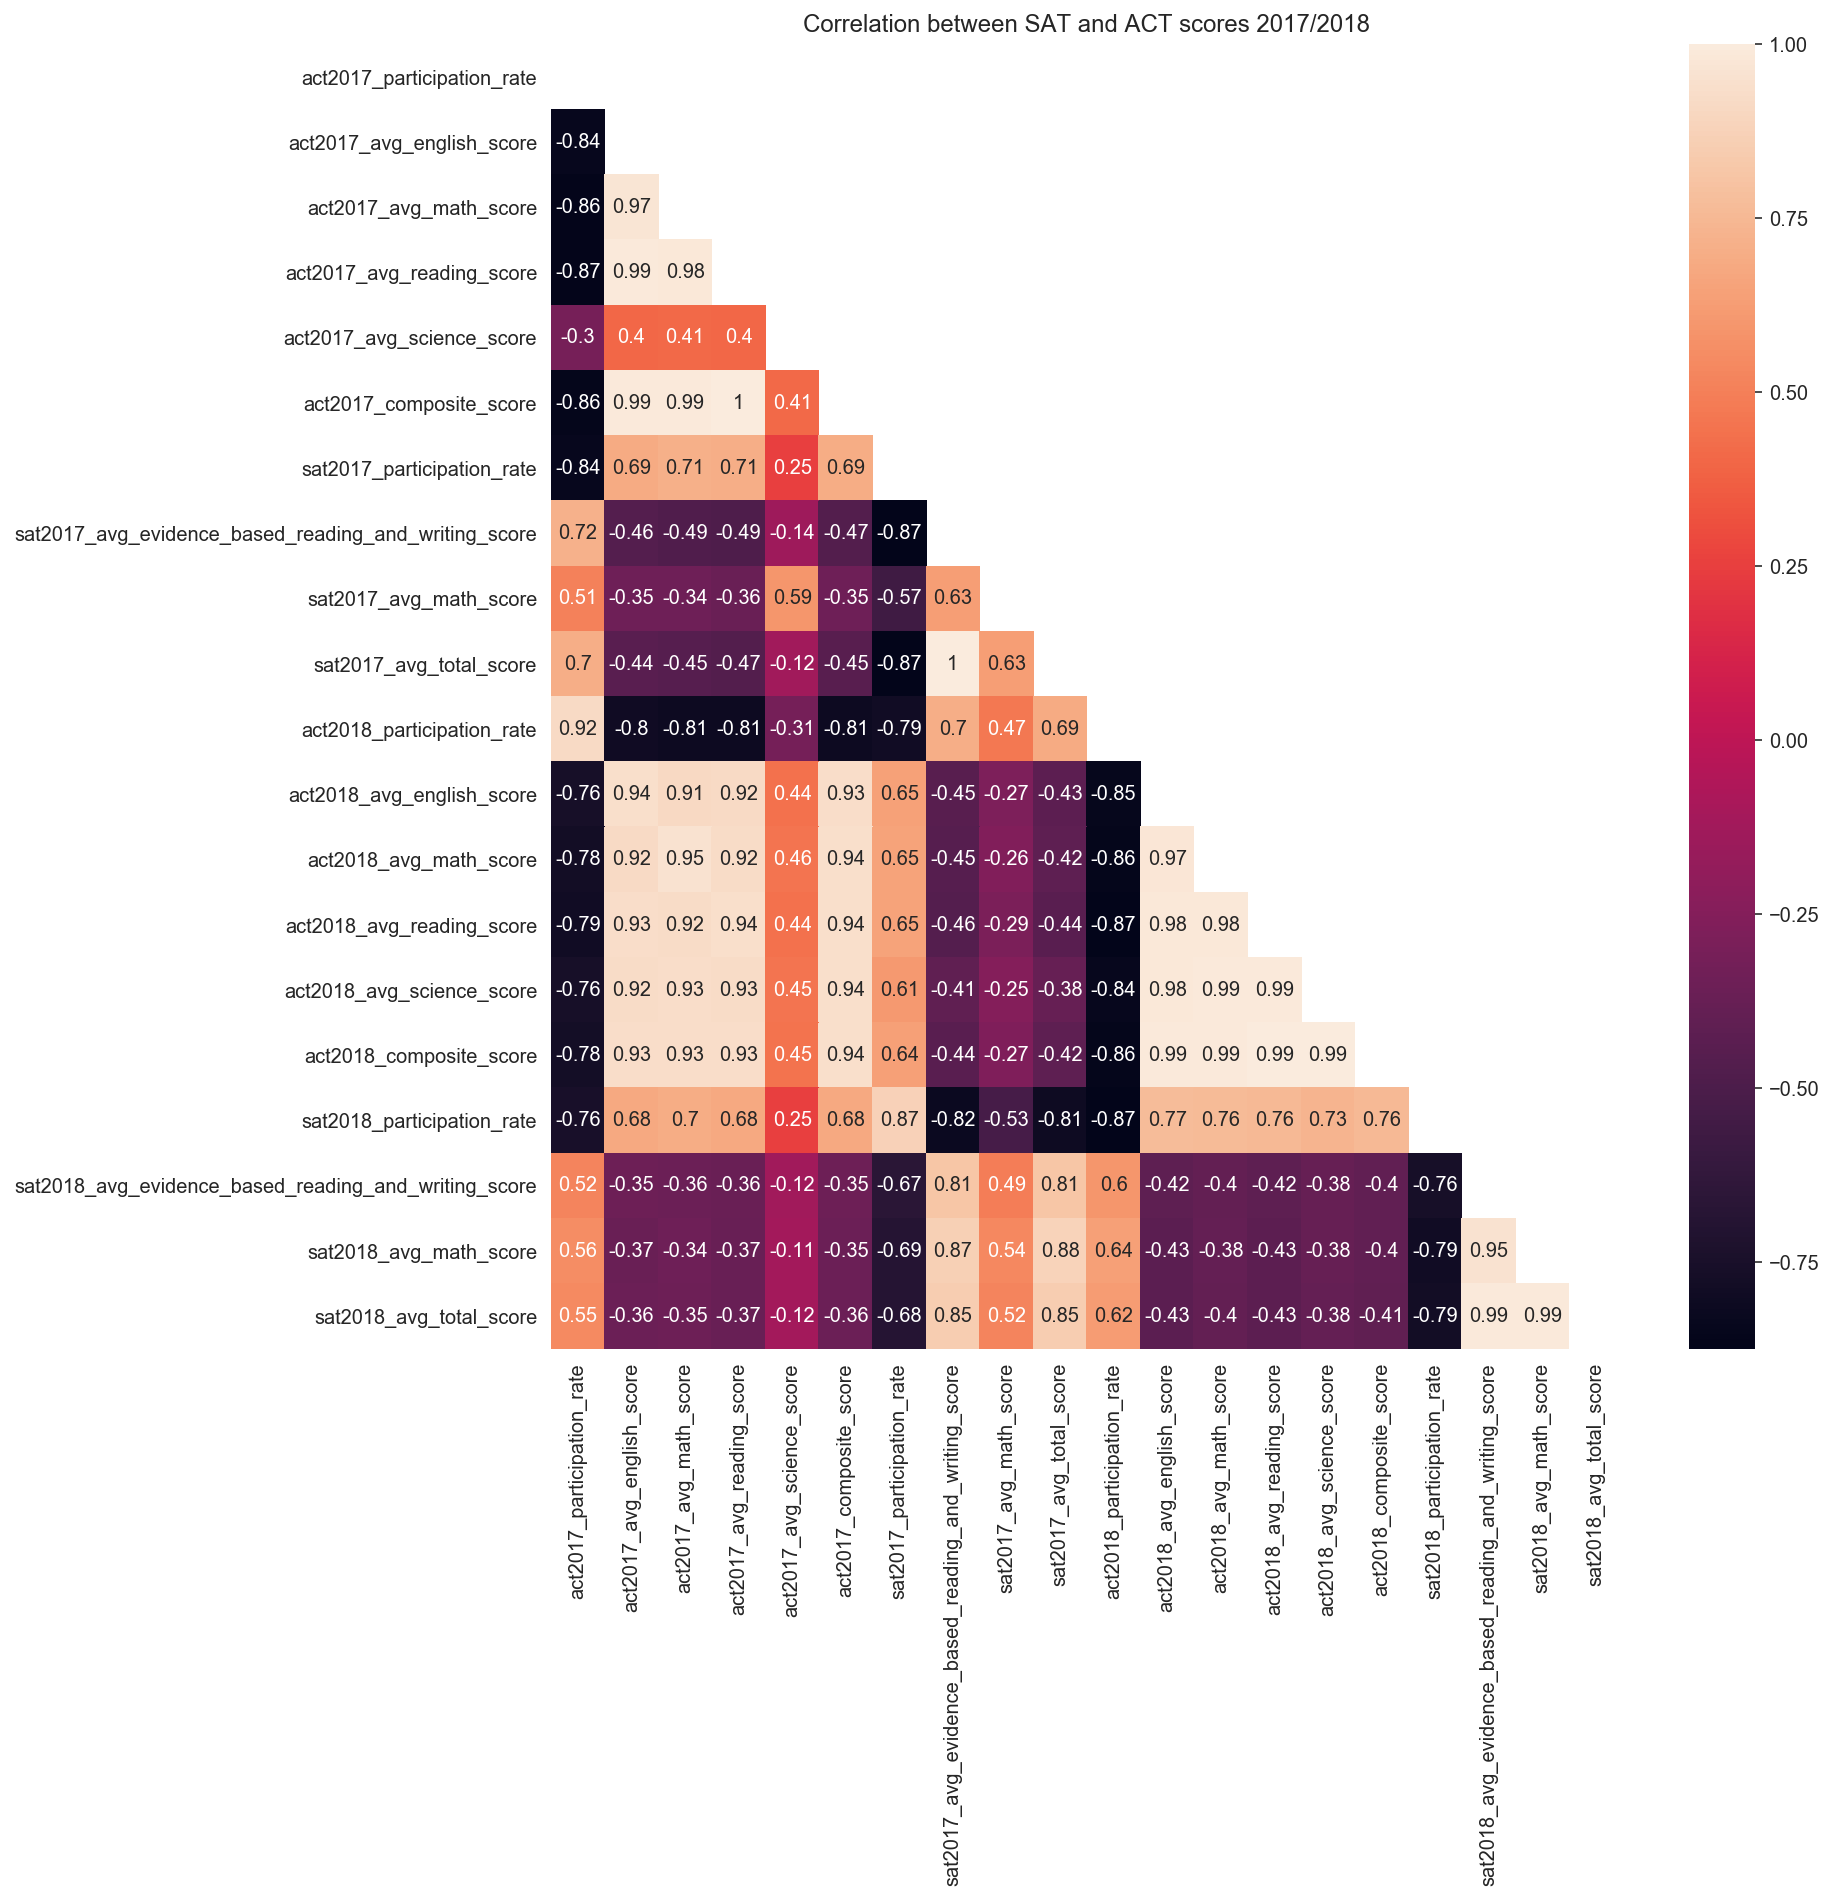

In [70]:
plt.figure(figsize=(12,12)) #Adjusted figsize to make it more readable
sns.heatmap(all_merge.corr(),annot = True,mask =np.triu(np.ones_like(all_merge.corr()))).set_title("Correlation between SAT and ACT scores 2017/2018");

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [71]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels,colorlist=['forestgreen','orange','m','b']):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize =(12,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],color = colorlist[i]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [72]:
ratelist = ['sat2017_participation_rate','act2017_participation_rate','sat2018_participation_rate','act2018_participation_rate']
ratetitle = ['SAT2017 participation rate','ACT2017 participation rate','SAT2018 participation rate','ACT2018 participation rate']
ratelabel = ['Participation rate','Participation rate','Participation rate','Participation rate']
mathlist = ['sat2017_avg_math_score','act2017_avg_math_score','sat2018_avg_math_score','act2018_avg_math_score']
mathtitle = ['SAT2017 avg math score','ACT2017 avg math score','SAT2018 avg math score','ACT2018 avg math score']
mathlabel = ['Math score','Math score','Math score','Math score']
Readinglist= ['sat2017_avg_evidence_based_reading_and_writing_score','act2017_avg_english_score','sat2018_avg_evidence_based_reading_and_writing_score','act2018_avg_english_score']
Readingtitle= ['SAT2017 avg evidence based reading and writing score','ACT2017 avg english score','SAT2018 avg evidence based reading and writing score','ACT2018 avg english score']
Readinglabel = ['Score','Score','Score','Score']


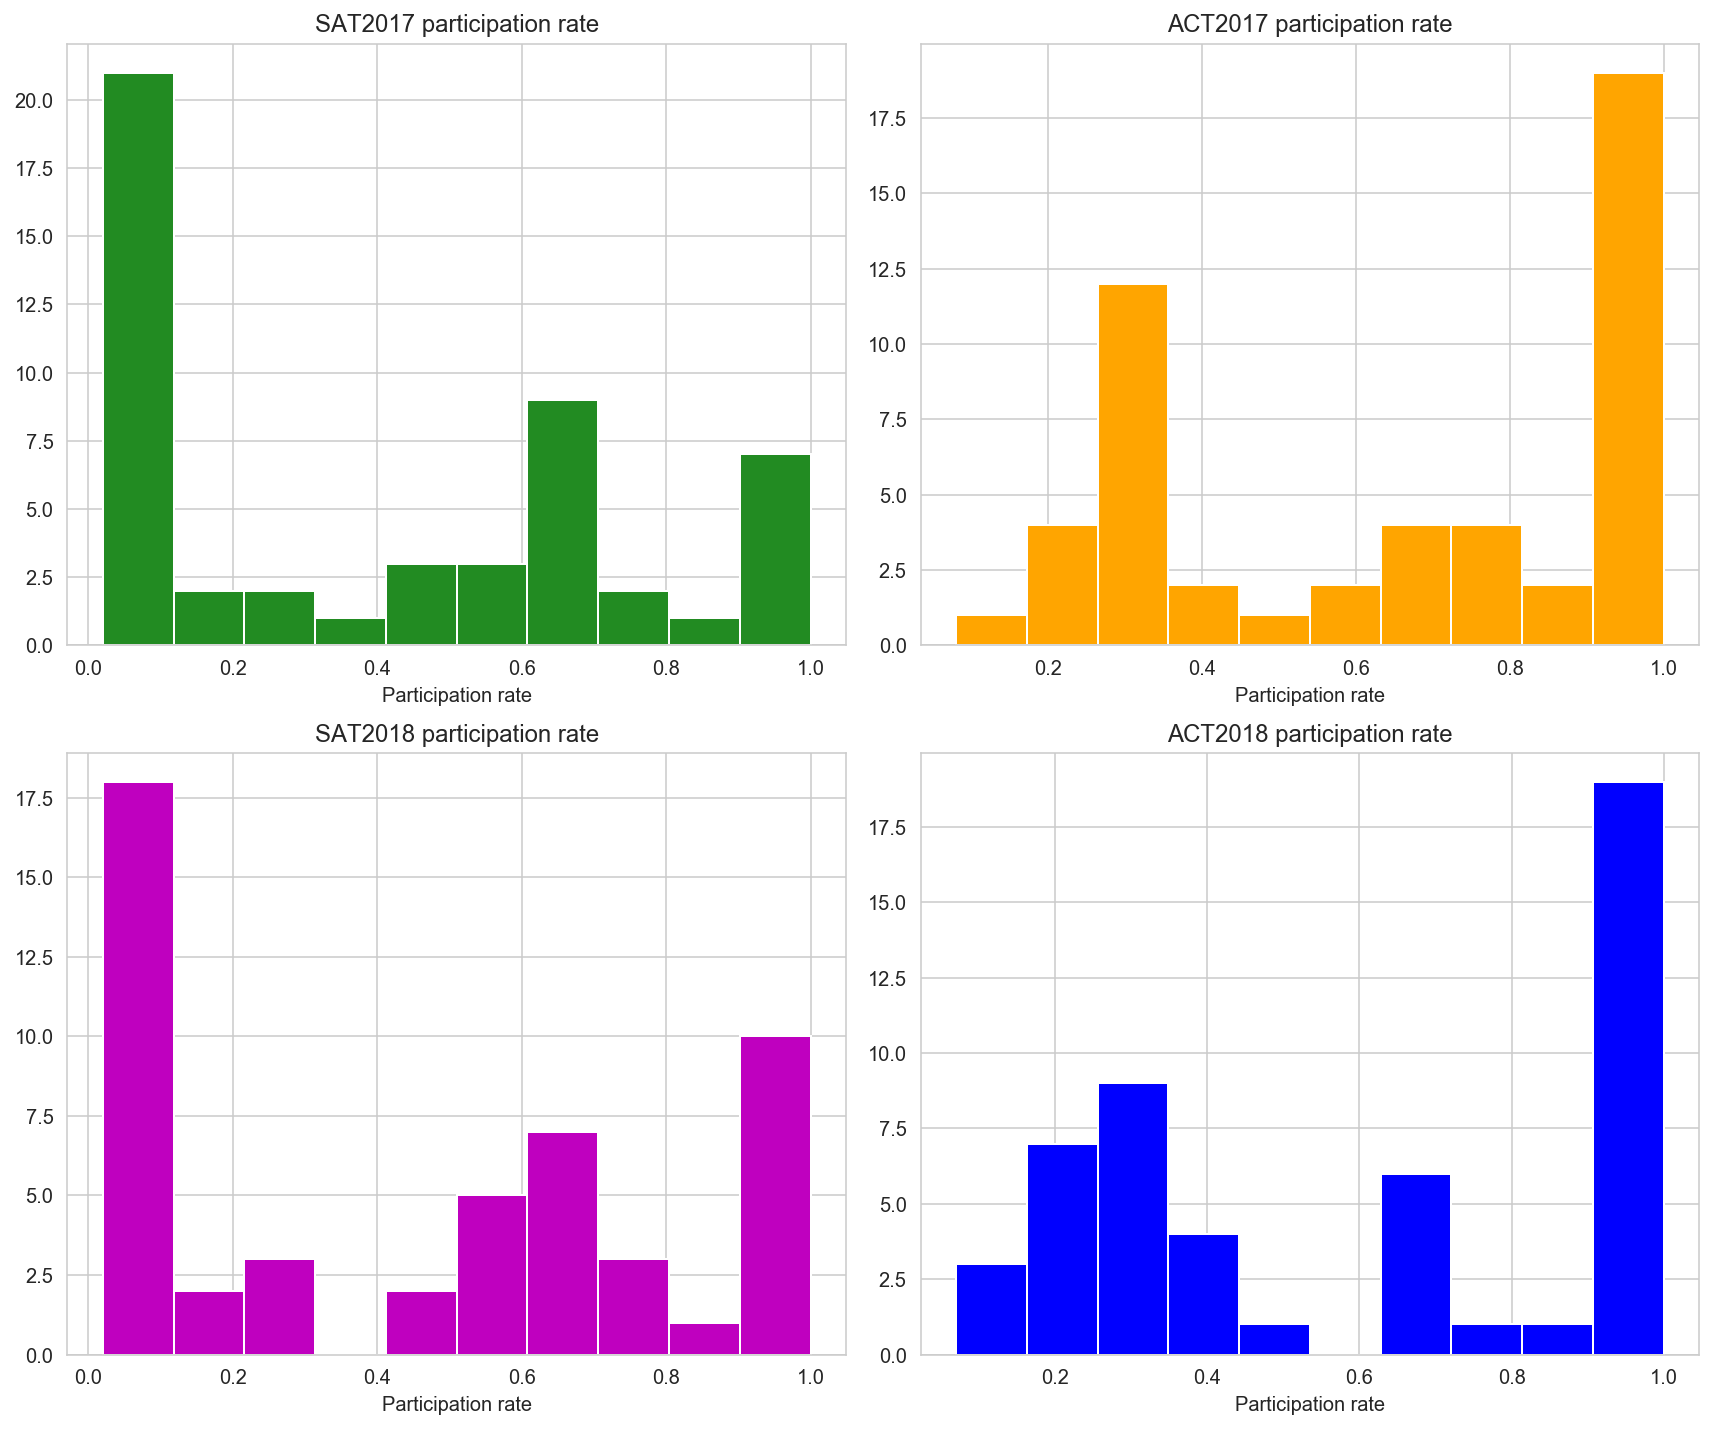

In [73]:
# Code
subplot_histograms(all_merge, ratelist, ratetitle, ratelabel) #plotting histograms for participation rates

plt.tight_layout()


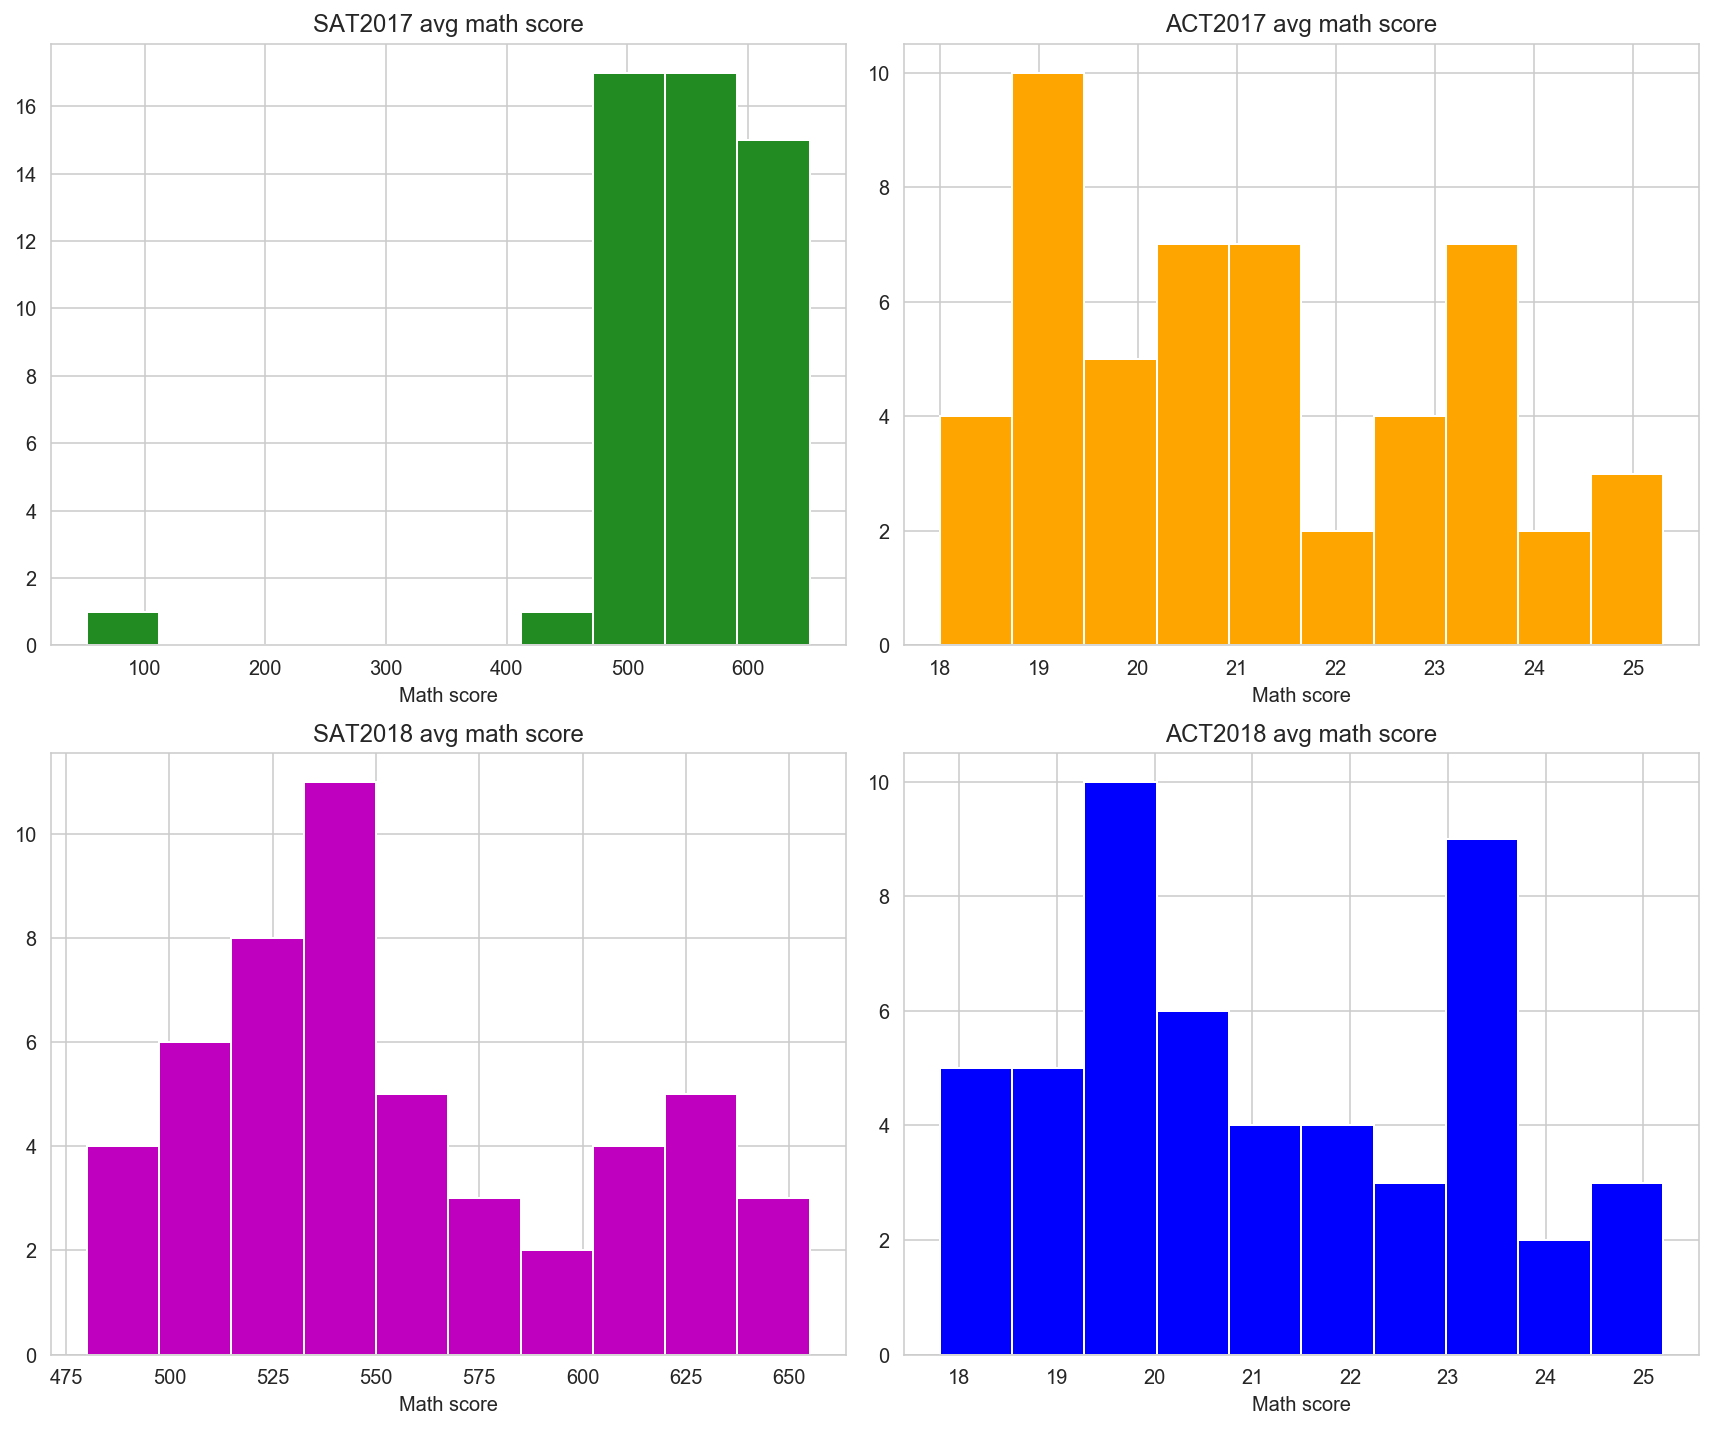

In [74]:
subplot_histograms(all_merge, mathlist, mathtitle, mathlabel) #plotting histograms for math scores

plt.tight_layout()


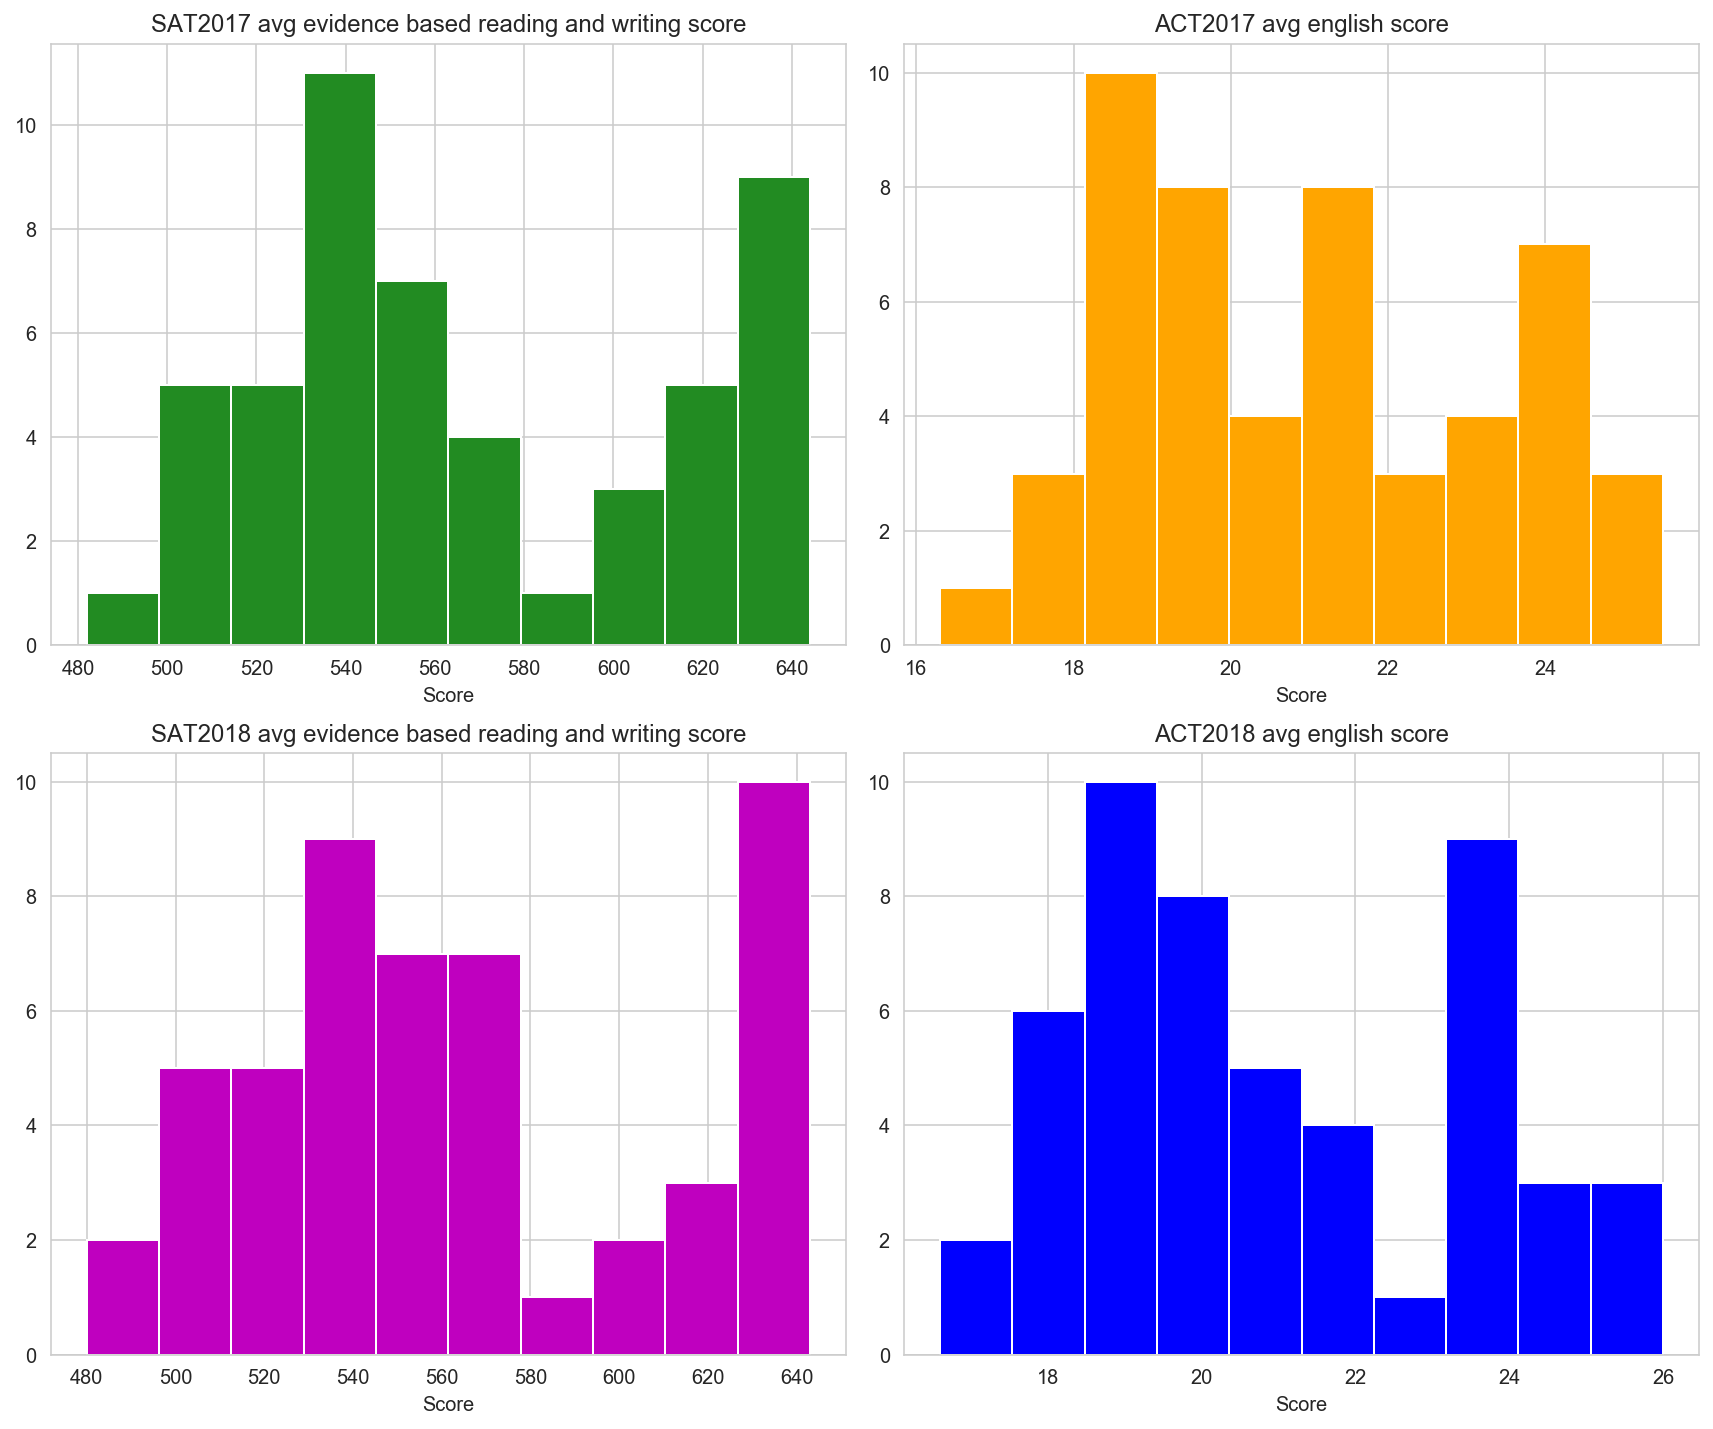

In [75]:
subplot_histograms(all_merge, Readinglist, Readingtitle, Readinglabel) #plotting histograms for reading and writing
plt.tight_layout()


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [76]:
def scatterplots(dataframe, list_of_columns, titles, labels):
    plt.figure(figsize=(10, 8)) #Set figuresize

    # Create scatter plot.
    plt.scatter(dataframe[list_of_columns].loc[:,list_of_columns[0]],dataframe[list_of_columns].loc[:,list_of_columns[1]]);
    plt.title(titles, fontsize = 25)
    plt.ylabel(labels[1], fontsize = 20)
    plt.xlabel(labels[0], fontsize = 20); #Set titles and labels

In [77]:
mathscore_2017 = ['sat2017_avg_math_score','act2017_avg_math_score']
mathscore2017_title = 'Math score 2017' 
mathscore2017_label = ['SAT2017 math score', 'ACT2017 math score']
verbalreadingscore_2017 = ['sat2017_avg_evidence_based_reading_and_writing_score','act2017_avg_reading_score']
verbalreading2017_title = 'Verbal reading score 2017'
verbalreading2017_label = ['SAT2017 reading and writing score','ACT2017 reading score']
totalcompo2017 = ['sat2017_avg_total_score','act2017_composite_score']
totalcompo2017_title = 'SAT total and ACT composite score 2017'
totalcompo2017_label = ['SAT2017 total score','ACT2017 composite score']
sattotal2017_2018 = ['sat2017_avg_total_score','sat2018_avg_total_score']
sattotal2017_2018_title = 'SAT total score 2017 VS. 2018'
sattotal2017_2018_label = ['SAT2017 total score','SAT2018 total score']
actcompo2017_2018 = ['act2017_composite_score','act2018_composite_score']
actcompo2017_2018_title = 'ACT composite score 2017 VS. 2018'
actcompo2017_2018_label = ['ACT2017 composite score','ACT2018 composite score']

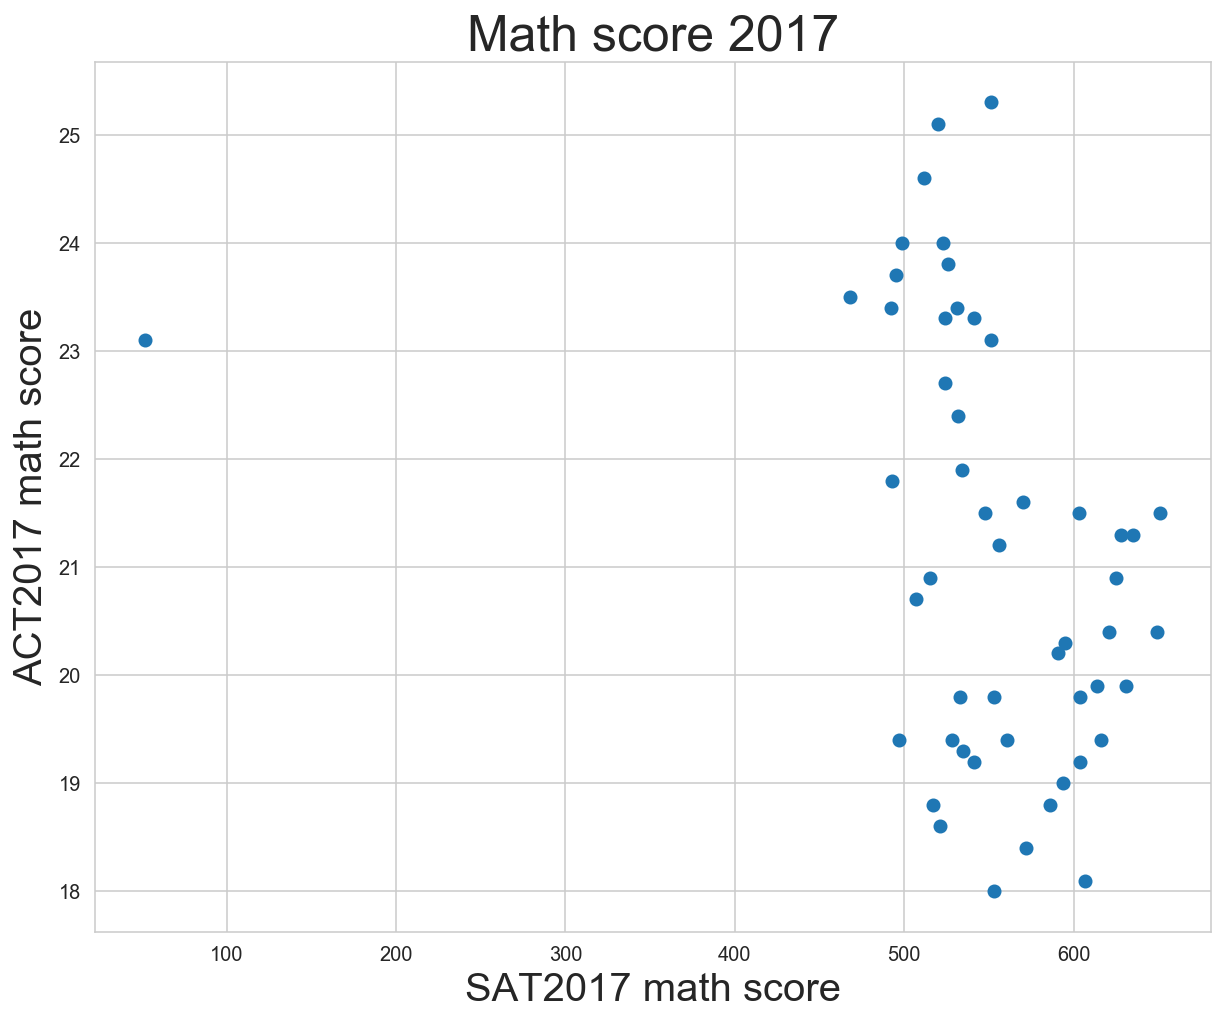

In [78]:
scatterplots(all_merge, mathscore_2017, mathscore2017_title, mathscore2017_label)

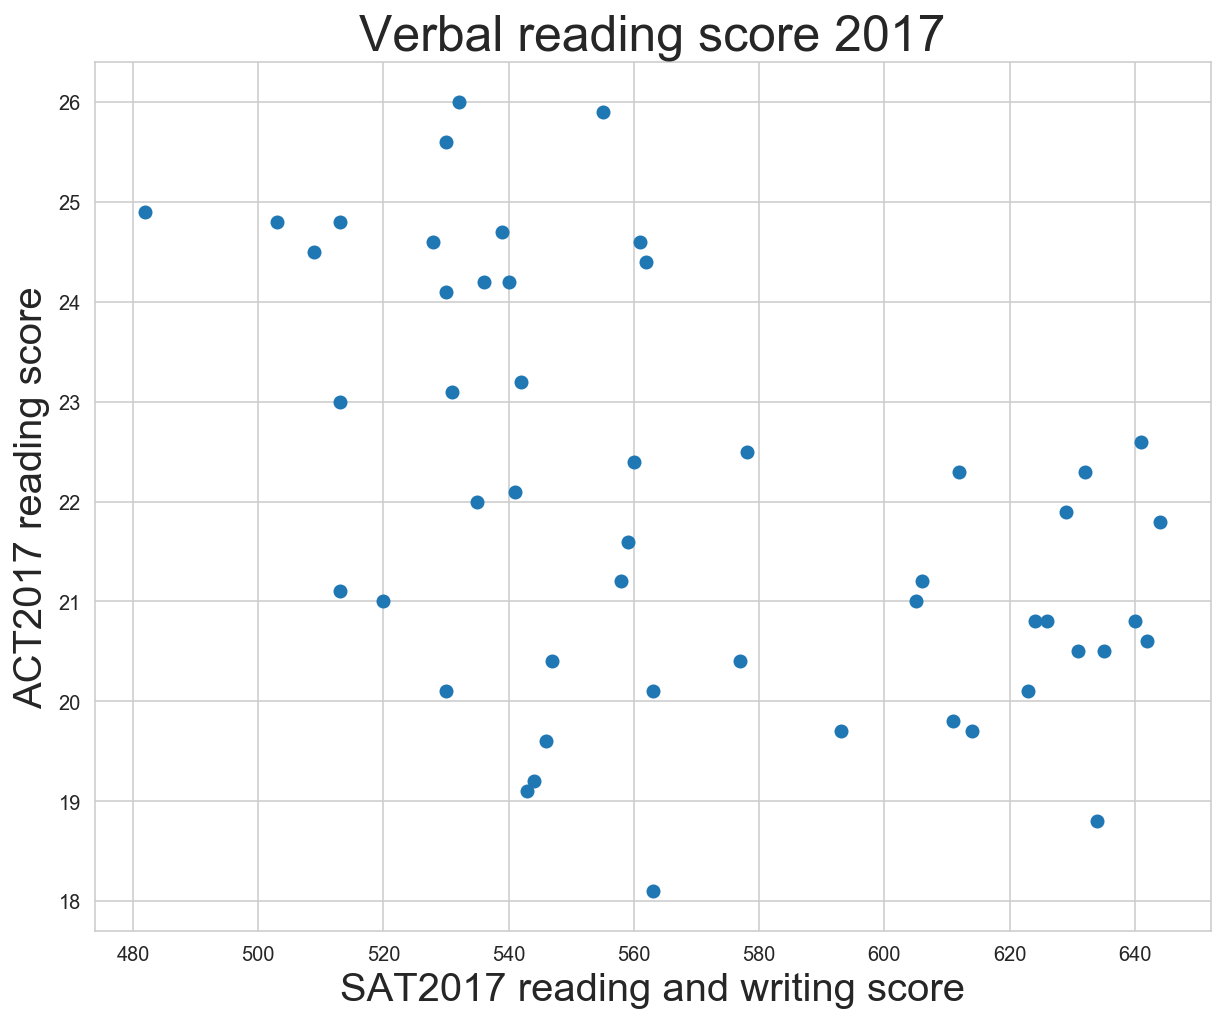

In [79]:
scatterplots(all_merge, verbalreadingscore_2017, verbalreading2017_title, verbalreading2017_label)

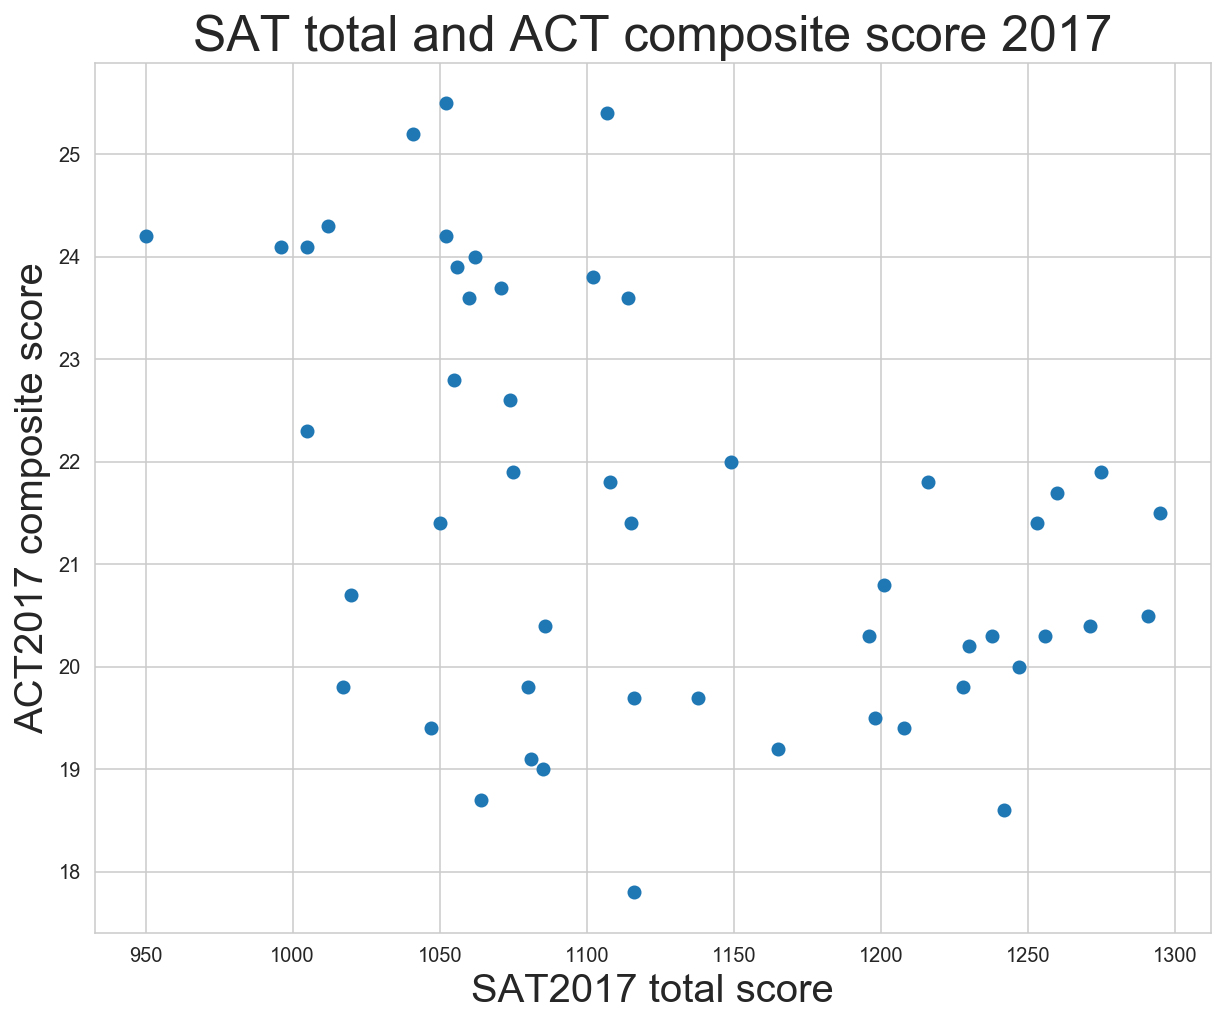

In [80]:
scatterplots(all_merge, totalcompo2017, totalcompo2017_title, totalcompo2017_label)

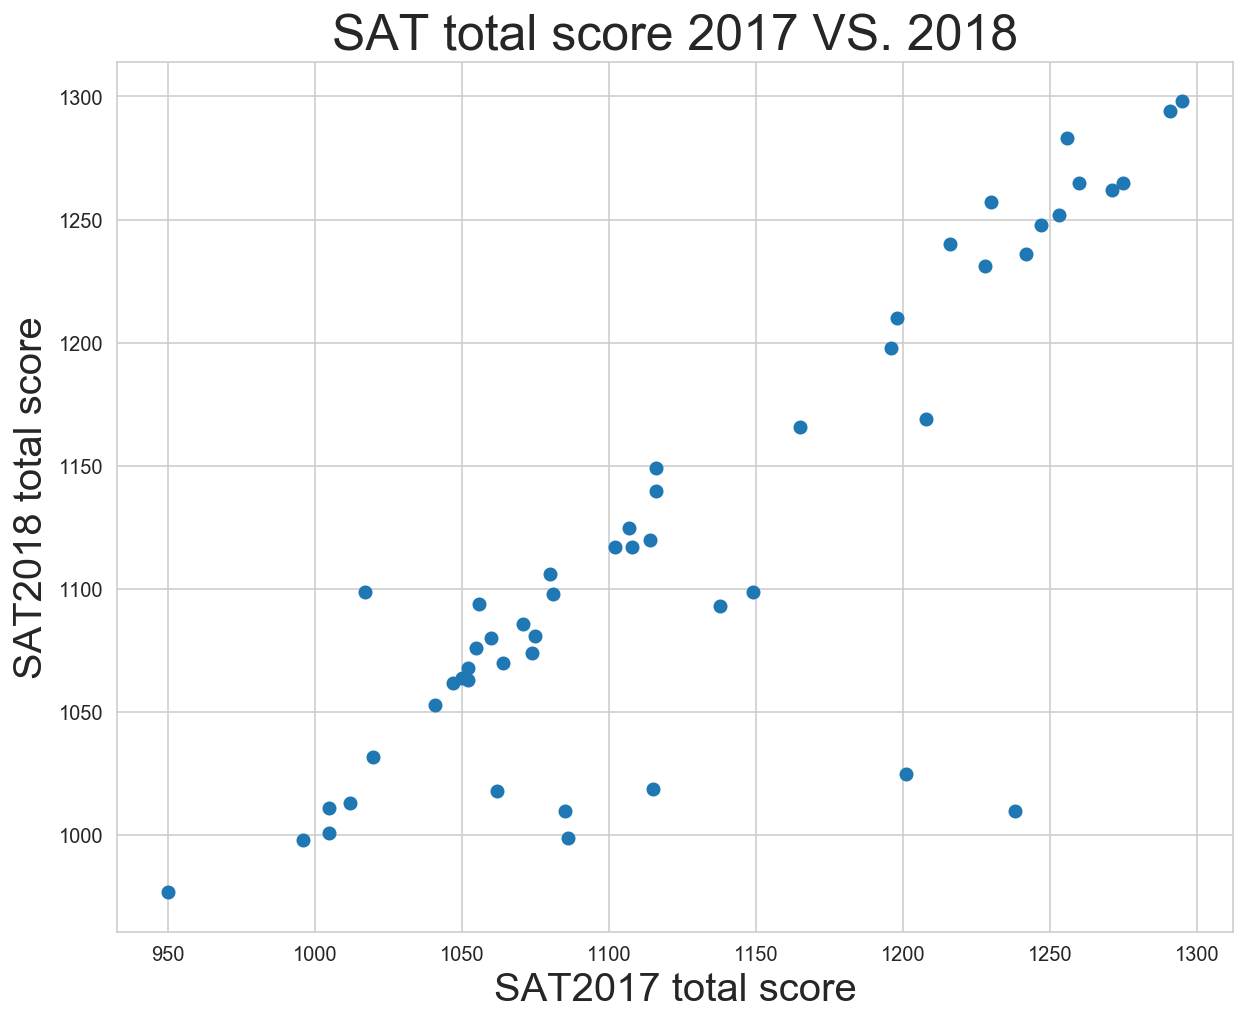

In [81]:
scatterplots(all_merge, sattotal2017_2018, sattotal2017_2018_title, sattotal2017_2018_label)

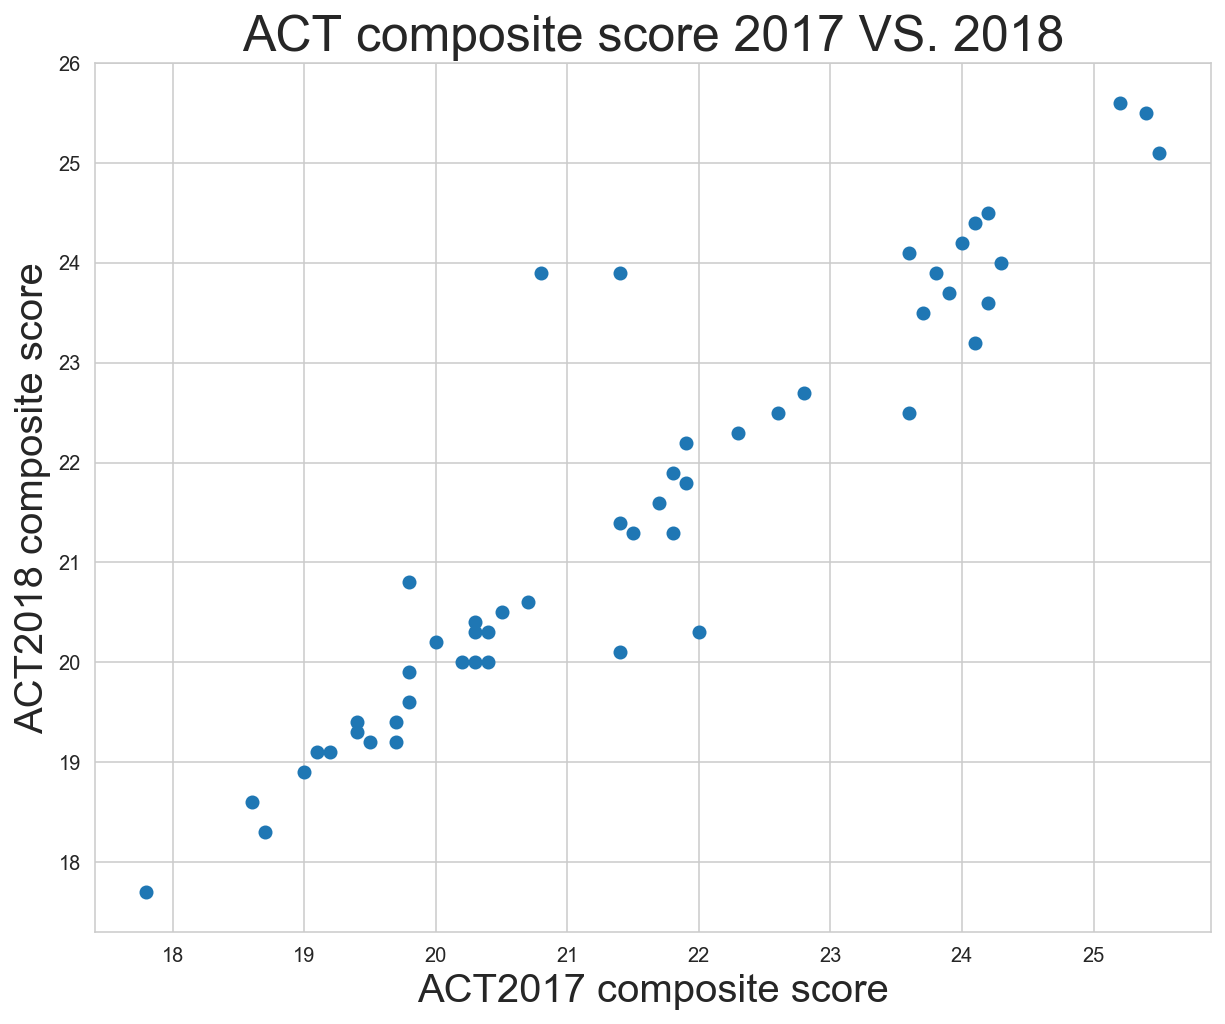

In [82]:
scatterplots(all_merge, actcompo2017_2018, actcompo2017_2018_title, actcompo2017_2018_label)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [83]:
all_merge.columns

Index(['state', 'act2017_participation_rate', 'act2017_avg_english_score',
       'act2017_avg_math_score', 'act2017_avg_reading_score',
       'act2017_avg_science_score', 'act2017_composite_score',
       'sat2017_participation_rate',
       'sat2017_avg_evidence_based_reading_and_writing_score',
       'sat2017_avg_math_score', 'sat2017_avg_total_score',
       'act2018_participation_rate', 'act2018_avg_english_score',
       'act2018_avg_math_score', 'act2018_avg_reading_score',
       'act2018_avg_science_score', 'act2018_composite_score',
       'sat2018_participation_rate',
       'sat2018_avg_evidence_based_reading_and_writing_score',
       'sat2018_avg_math_score', 'sat2018_avg_total_score'],
      dtype='object')

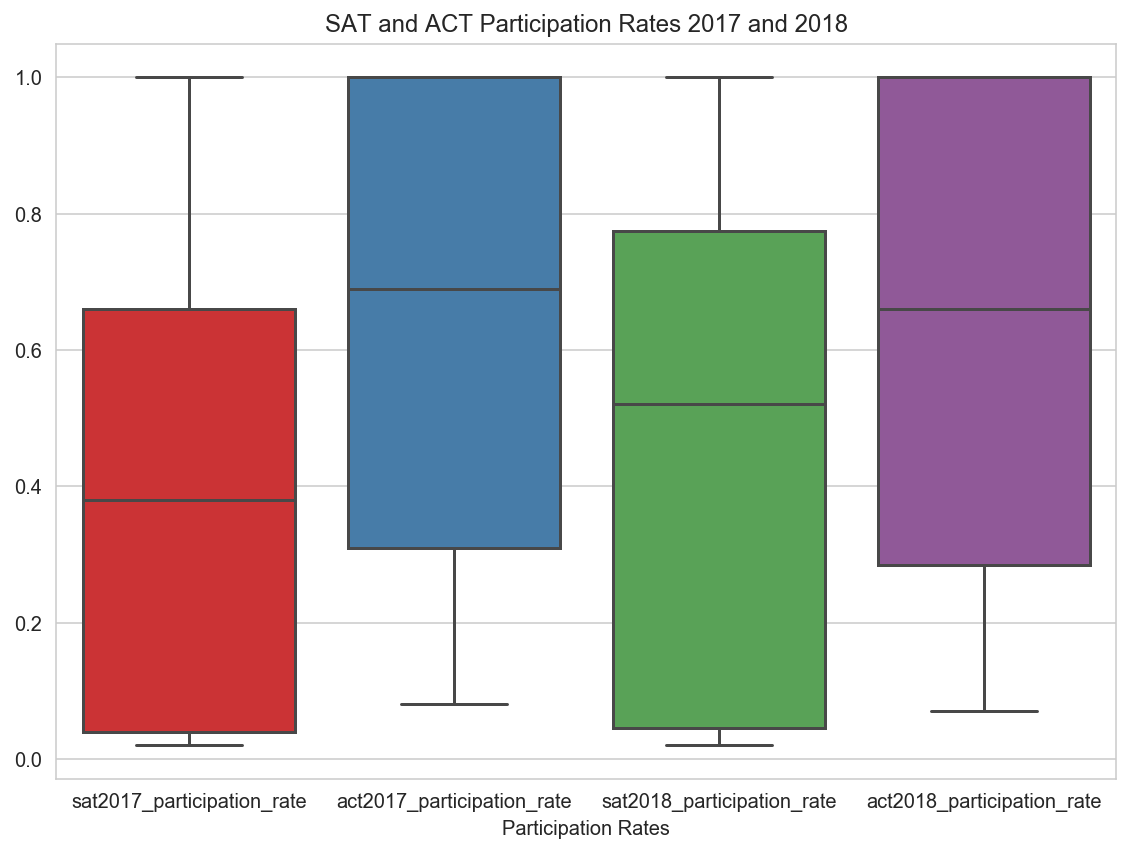

In [84]:
# Code
#Boxplot to compare spread of data for SAT and ACT participation rates
plt.figure(figsize=(8,6))
ax = sns.boxplot(data = all_merge[['sat2017_participation_rate','act2017_participation_rate'
                 ,'sat2018_participation_rate','act2018_participation_rate']],palette = 'Set1');
ax.set_xlabel("Participation Rates")
ax.set_title('SAT and ACT Participation Rates 2017 and 2018')

plt.tight_layout()

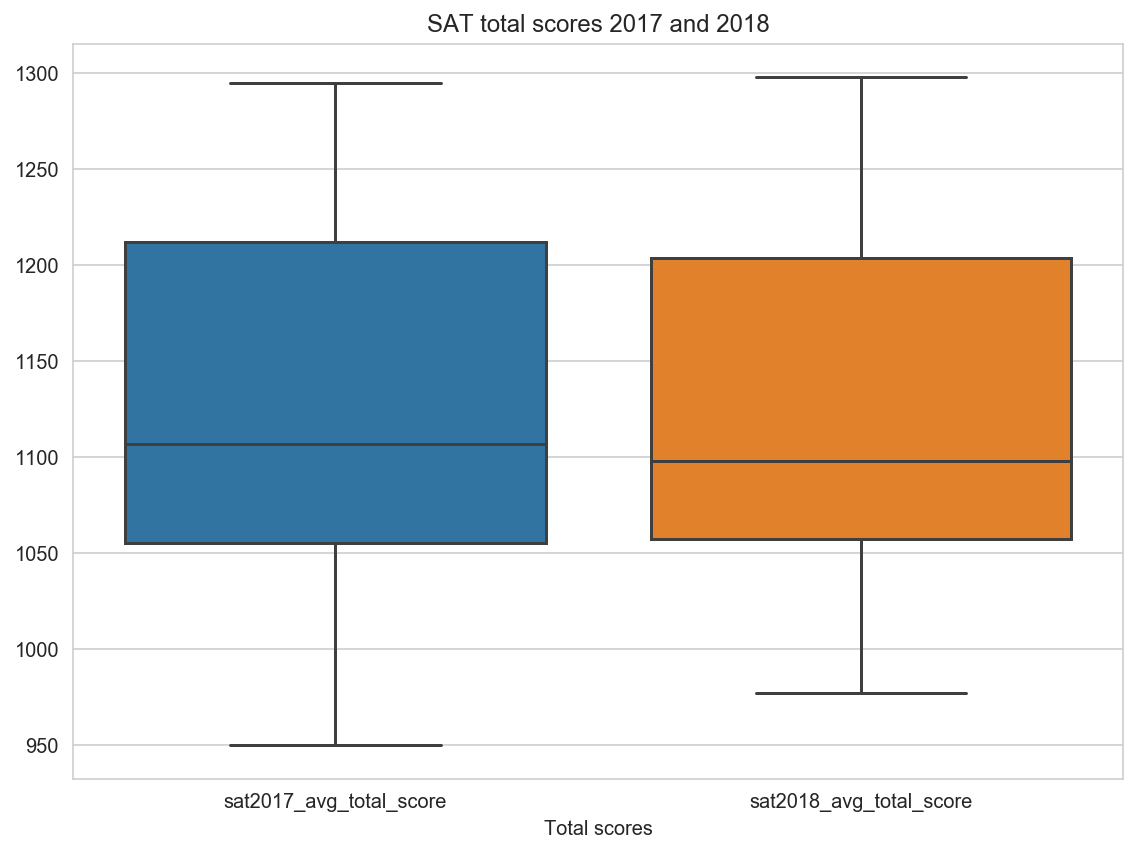

In [85]:
#Boxplot to comapre SAT total scores
plt.figure(figsize=(8,6))
ax = sns.boxplot(data = all_merge[['sat2017_avg_total_score','sat2018_avg_total_score']]);
ax.set_xlabel("Total scores")
ax.set_title('SAT total scores 2017 and 2018')

plt.tight_layout()

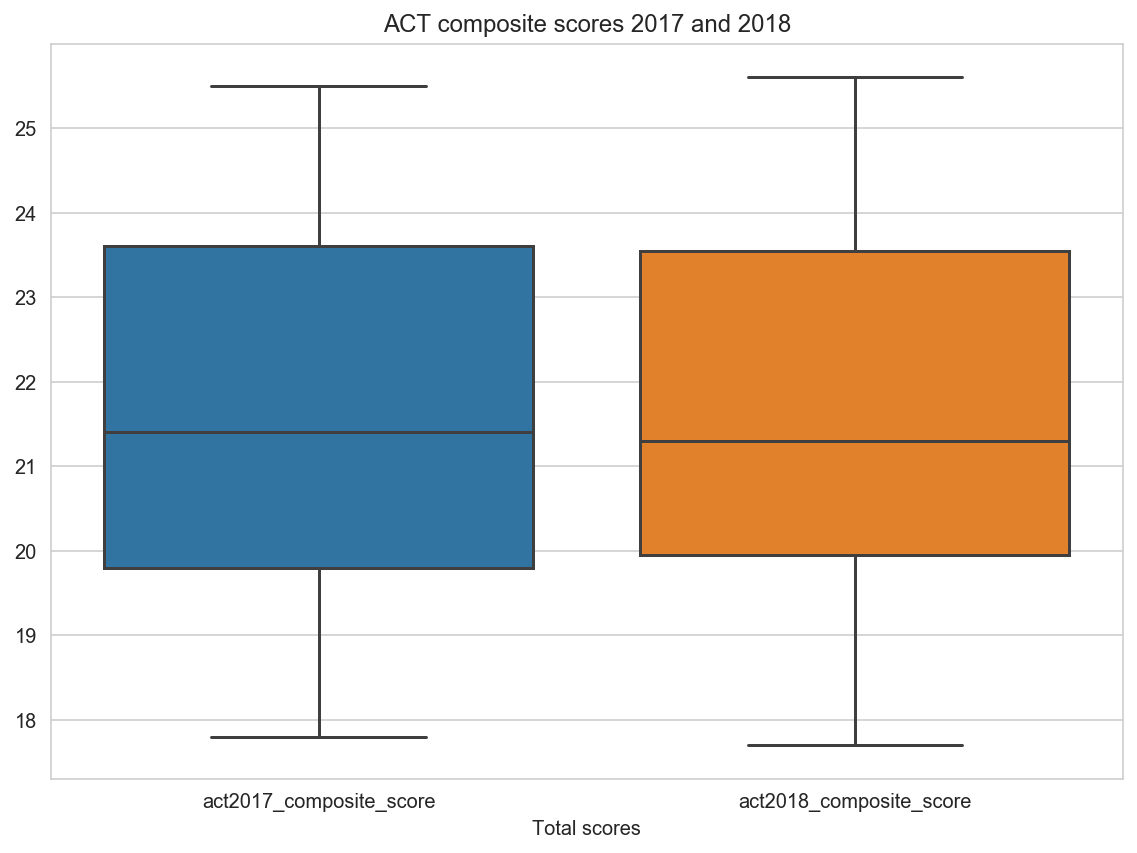

In [86]:
#Boxplot to compare ACT composite scores
plt.figure(figsize=(8,6))
ax = sns.boxplot(data = all_merge[['act2017_composite_score','act2018_composite_score']]);
ax.set_xlabel("Total scores")
ax.set_title('ACT composite scores 2017 and 2018')

plt.tight_layout()

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

As earlier mentioned in investigating trends, I noticed Disctrict of Columbia had one of the highest SAT participation rates in 2017 and yet had the lowest SAT total score in 2017 and 2018 as well. Looking at scatterplots between SAT total scores, ACT composite score and their respective participation rates, there seems to be a negative correlation which is saying the higher the participation rate the lower the scores and vice versa.

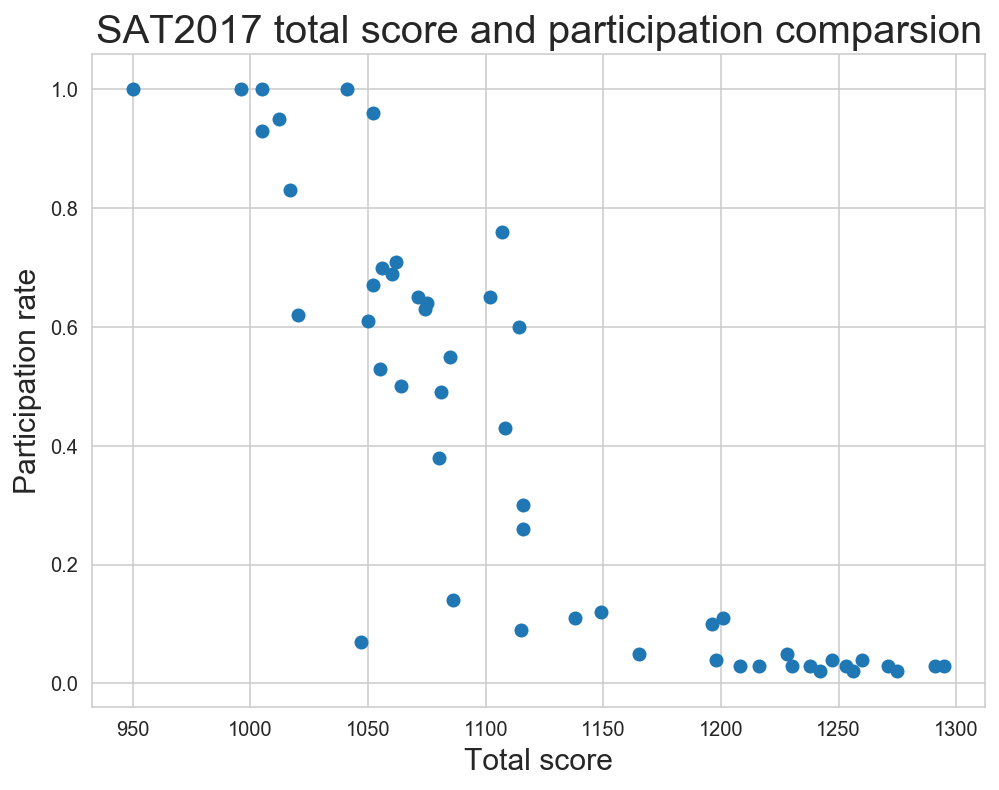

In [87]:
# Scatter plot to see relationship between SAT2017 total score and participation rate
plt.figure(figsize=(8,6))
plt.scatter(all_merge['sat2017_avg_total_score'],all_merge['sat2017_participation_rate']);
plt.title('SAT2017 total score and participation comparsion', fontsize = 20)
plt.ylabel('Participation rate', fontsize = 15)
plt.xlabel('Total score', fontsize = 15); #Set titles and labels

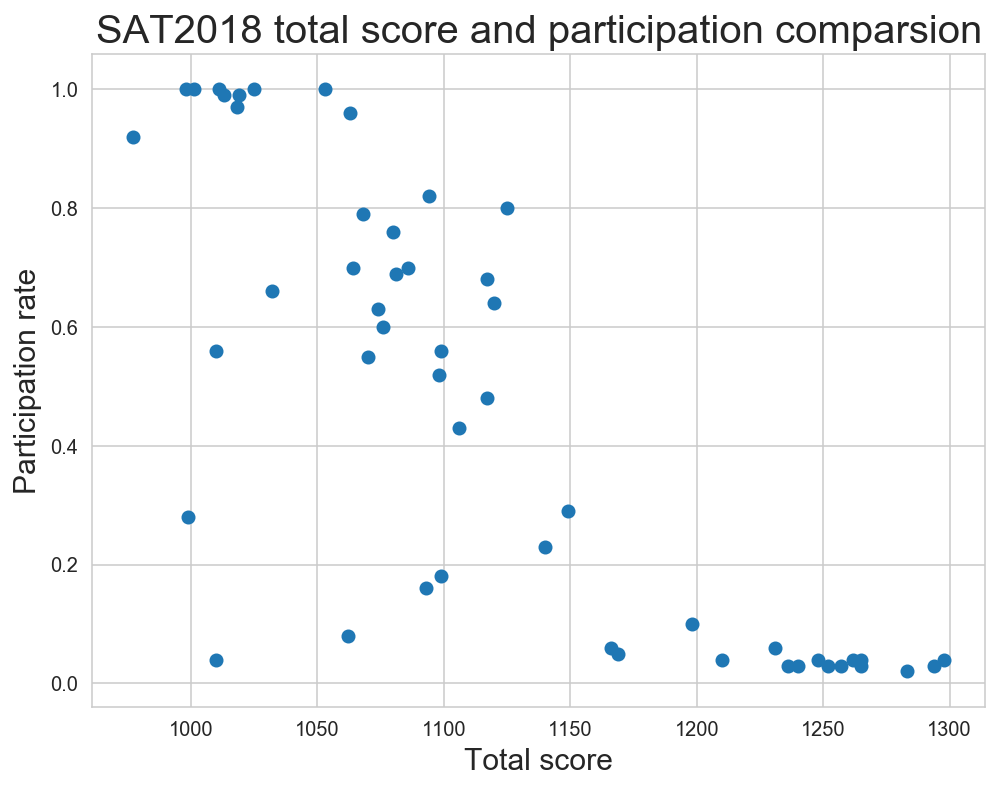

In [88]:
# Scatter plot to see relationship between SAT2018 total score and participation comparsion rate
plt.figure(figsize=(8,6))
plt.scatter(all_merge['sat2018_avg_total_score'],all_merge['sat2018_participation_rate']);
plt.title('SAT2018 total score and participation comparsion', fontsize = 20)
plt.ylabel('Participation rate', fontsize = 15)
plt.xlabel('Total score', fontsize = 15); #Set titles and labels

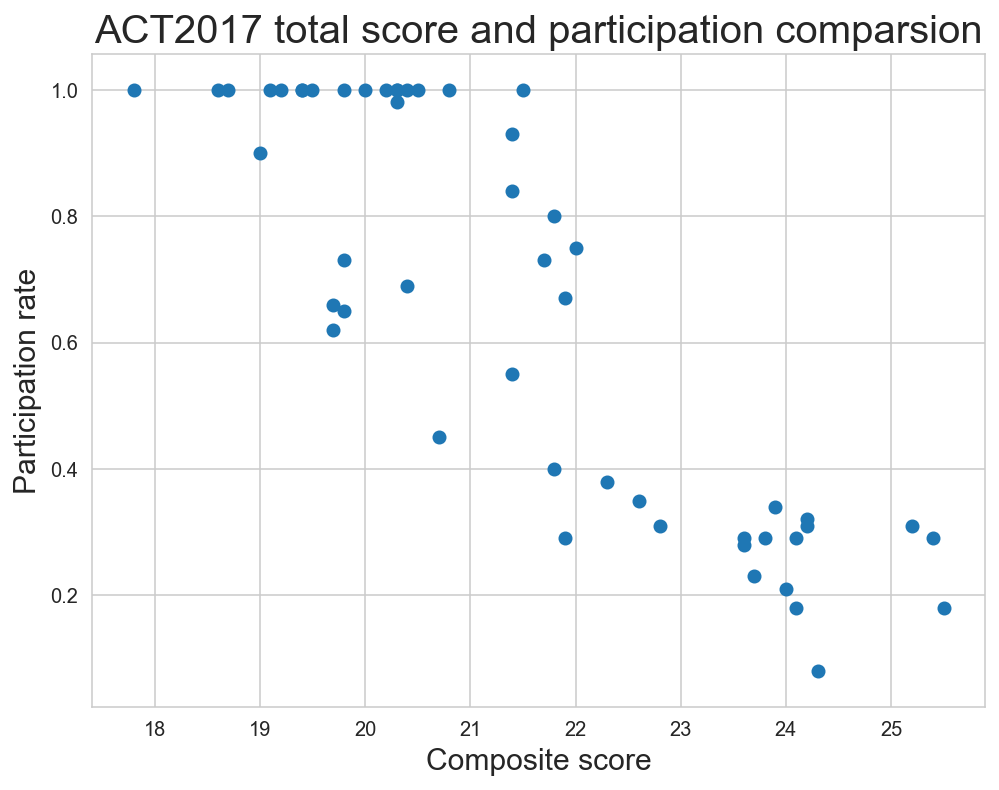

In [89]:
# Scatter plot to see relationship between ACT2017 total score and participation comparsion
plt.figure(figsize=(8,6))
plt.scatter(all_merge['act2017_composite_score'],all_merge['act2017_participation_rate']);
plt.title('ACT2017 total score and participation comparsion', fontsize = 20)
plt.ylabel('Participation rate', fontsize = 15)
plt.xlabel('Composite score', fontsize = 15); #Set titles and labels

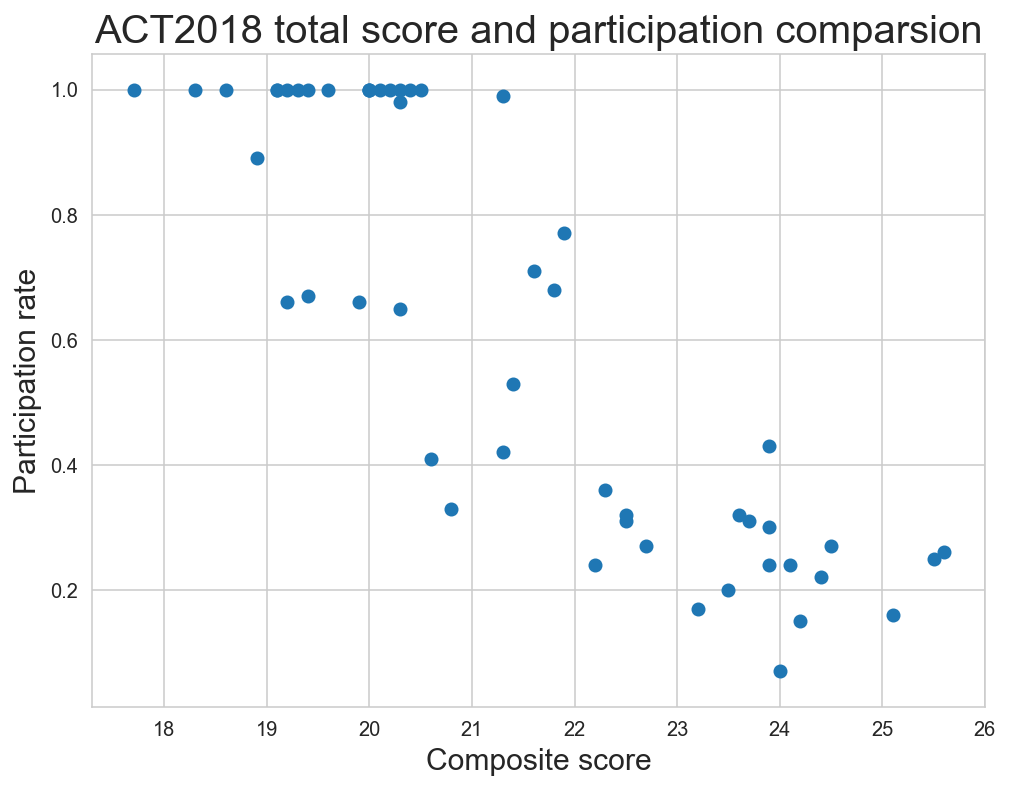

In [90]:
# Scatter plot to compare relationship between ACT2018 total score and participation comparsion rate 
plt.figure(figsize=(8,6))
plt.scatter(all_merge['act2018_composite_score'],all_merge['act2018_participation_rate']);
plt.title('ACT2018 total score and participation comparsion', fontsize = 20)
plt.ylabel('Participation rate', fontsize = 15)
plt.xlabel('Composite score', fontsize = 15); #Set titles and labels

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [91]:
all_merge.describe().T #Transposing all_merge describe features 

,count,mean,std,min,25%,50%,75%,max
act2017_participation_rate,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act2017_avg_english_score,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act2017_avg_math_score,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act2017_avg_reading_score,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act2017_avg_science_score,51.0,21.041176,3.182463,2.30,19.900,21.30,22.750,24.9
act2017_composite_score,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat2017_participation_rate,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat2017_avg_evidence_based_reading_and_writing_score,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat2017_avg_math_score,51.0,547.627451,84.909119,52.00,522.000,548.00,599.000,651.0
sat2017_avg_total_score,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


Answer: Analyzing the histogram plots, we can see that they do not resemble the shape of a normal distribution as data is not centered around the center implying that mean, median and mode are different from each other. More specifically, looking at the participation rate histograms, SAT and ACT participation distributions are like mirrors of each other where there is a huge frequency of SAT rates around 0% and a huge frequency of ACT rates around 1%.This can further be seen in the boxplots where SAT participation rates have long top whiskers indicating data points with higher rates are outliers and ACT participation rates have longer bottom whiskers indicating data points with lower rates are outliers


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [92]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?